In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from matplotlib.dates import DateFormatter

In [2]:
def fill_array(len, value):
    x = []
    for i in range(len):
        x.append(value)
        
    return x

In [3]:
df = None
plts_df = None
for i in range(7):
    x = pd.read_excel(str(i+7)+' Jan 2018.xlsx')
    y = pd.read_excel(str(i+7)+' Jan 2018 PLTS.xlsx')
    x['Time'] = '2018-01-'+str(i+7)+' '+x['Jam'].astype(str)+':00:00'
    y['Time'] = '2018-01-'+str(i+7)+' '+y['Jam'].astype(str)+':00:00'
    x.drop(['Jam'], axis=1, inplace=True)
    y.drop(['Jam'], axis=1, inplace=True)
    df = pd.concat([df,x], ignore_index=True)
    plts_df = pd.concat([plts_df,y], ignore_index=True)

In [4]:
df

,PrediksiBeban,PrediksiDayaBaterai,PrediksiSOC,PrediksiPLTS,Time
0,320.11572,101.992300,0.375216,-0.1845,2018-01-7 0:00:00
1,255.07933,-54.481450,0.355183,-0.1845,2018-01-7 1:00:00
2,324.43027,99.480700,0.226248,-0.1845,2018-01-7 2:00:00
3,325.94418,-48.060207,1.082568,-0.1845,2018-01-7 3:00:00
4,288.28232,35.302810,1.072106,-0.1845,2018-01-7 4:00:00
...,...,...,...,...,...
146,171.82579,12.001025,0.321386,-0.1845,2018-01-13 19:00:00
147,284.51343,95.846850,0.181183,-0.1845,2018-01-13 20:00:00
148,309.98068,133.548870,1.085720,-0.1845,2018-01-13 21:00:00
149,381.53372,-33.096886,0.477317,-0.1845,2018-01-13 22:00:00


In [5]:
plts_df

,PrediksiBeban,PrediksiDayaBaterai,PrediksiSOC,PrediksiPLTS,Time
0,320.11572,101.992300,0.375216,-0.1353,2018-01-7 0:00:00
1,255.07933,-54.481450,0.355183,-0.1353,2018-01-7 1:00:00
2,324.43027,99.480700,0.226248,-0.1353,2018-01-7 2:00:00
3,325.94418,-48.060207,1.082568,-0.1353,2018-01-7 3:00:00
4,288.28232,35.302810,1.072106,-0.1353,2018-01-7 4:00:00
...,...,...,...,...,...
146,171.82579,12.001025,0.321386,-0.1353,2018-01-13 19:00:00
147,284.51343,95.846850,0.181183,-0.1353,2018-01-13 20:00:00
148,309.98068,133.548870,1.085720,-0.1353,2018-01-13 21:00:00
149,381.53372,-33.096886,0.477317,-0.1353,2018-01-13 22:00:00


In [6]:
df['Time'] = pd.to_datetime(df['Time'], utc=False)
df.set_index('Time', inplace=True)
plts_df['Time'] = pd.to_datetime(plts_df['Time'], utc=False)
plts_df.set_index('Time', inplace=True)

In [7]:
#define dataframe saat degradasi baterai dan degradasi plts+baterai
df_batt = df.copy()
df_degbatt = plts_df.copy()

In [8]:
df['soe'] = (df['PrediksiSOC'] + 0.01387)/1.01892
plts_df['soe'] = (plts_df['PrediksiSOC'] + 0.01387)/1.01892

df['Selisih SOE'] = '-'
plts_df['Selisih SOE'] = '-'
for i in range (len(df['soe'])-1):
    df['Selisih SOE'][i+1] = df['soe'][i+1]-df['soe'][i]
for i in range (len(plts_df['soe'])-1):
    plts_df['Selisih SOE'][i+1] = plts_df['soe'][i+1]-plts_df['soe'][i]    
    
df['SOE'] = df['Selisih SOE']
df['SOE'][1:] = df['Selisih SOE'][1:]/100

plts_df['SOE'] = plts_df['Selisih SOE']
plts_df['SOE'][1:] = plts_df['Selisih SOE'][1:]/100

df['Selisih Daya dari SOE'] = df['SOE']
df['Selisih Daya dari SOE'][1:] = df['SOE'][1:]*1092

plts_df['Selisih Daya dari SOE'] = plts_df['SOE']
plts_df['Selisih Daya dari SOE'][1:] = plts_df['SOE'][1:]*1092

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\Lenovo\Anaconda3\lib\sit

In [9]:
df    

,PrediksiBeban,PrediksiDayaBaterai,PrediksiSOC,PrediksiPLTS,soe,Selisih SOE,SOE,Selisih Daya dari SOE
Time,,,,,,,,
2018-01-07 00:00:00,320.11572,101.992300,0.375216,-0.1845,0.381861,-,-,-
2018-01-07 01:00:00,255.07933,-54.481450,0.355183,-0.1845,0.362200,-0.019661,-0.000197,-0.214696
2018-01-07 02:00:00,324.43027,99.480700,0.226248,-0.1845,0.235659,-0.126541,-0.001265,-1.381833
2018-01-07 03:00:00,325.94418,-48.060207,1.082568,-0.1845,1.076079,0.84042,0.008404,9.177387
2018-01-07 04:00:00,288.28232,35.302810,1.072106,-0.1845,1.065811,-0.010268,-0.000103,-0.112129
...,...,...,...,...,...,...,...,...
2018-01-13 19:00:00,171.82579,12.001025,0.321386,-0.1845,0.329031,-0.720944,-0.007209,-7.872712
2018-01-13 20:00:00,284.51343,95.846850,0.181183,-0.1845,0.191431,-0.1376,-0.001376,-1.502592
2018-01-13 21:00:00,309.98068,133.548870,1.085720,-0.1845,1.079172,0.887741,0.008877,9.694135


In [10]:
plts_df

,PrediksiBeban,PrediksiDayaBaterai,PrediksiSOC,PrediksiPLTS,soe,Selisih SOE,SOE,Selisih Daya dari SOE
Time,,,,,,,,
2018-01-07 00:00:00,320.11572,101.992300,0.375216,-0.1353,0.381861,-,-,-
2018-01-07 01:00:00,255.07933,-54.481450,0.355183,-0.1353,0.362200,-0.019661,-0.000197,-0.214696
2018-01-07 02:00:00,324.43027,99.480700,0.226248,-0.1353,0.235659,-0.126541,-0.001265,-1.381833
2018-01-07 03:00:00,325.94418,-48.060207,1.082568,-0.1353,1.076079,0.84042,0.008404,9.177387
2018-01-07 04:00:00,288.28232,35.302810,1.072106,-0.1353,1.065811,-0.010268,-0.000103,-0.112129
...,...,...,...,...,...,...,...,...
2018-01-13 19:00:00,171.82579,12.001025,0.321386,-0.1353,0.329031,-0.720944,-0.007209,-7.872712
2018-01-13 20:00:00,284.51343,95.846850,0.181183,-0.1353,0.191431,-0.1376,-0.001376,-1.502592
2018-01-13 21:00:00,309.98068,133.548870,1.085720,-0.1353,1.079172,0.887741,0.008877,9.694135


In [11]:
SOE_df = df[['PrediksiSOC','PrediksiDayaBaterai','SOE','Selisih Daya dari SOE']]
SOE_plts_df = plts_df[['PrediksiSOC','PrediksiDayaBaterai','SOE','Selisih Daya dari SOE']]

In [12]:
df['PLTSdegr'] = df['PrediksiPLTS']*30/100
df['Beban-PLTS'] = df['PrediksiBeban'] - df['PLTSdegr']

df['PLNMethod1'] = df['SOE']
df['Direct Method'] = df['SOE']
df['PLNMethod2'] = df['SOE']
df['Via SOC'] = df['SOE']

#Menghitung hasil Direct Method
df['PLNMethod1'] = df['Beban-PLTS'] + df['PrediksiDayaBaterai']
df['Direct Method'] = (1 -(df['PLNMethod1']/df['PrediksiBeban']))*100

#Menghitung hasil Via SOC
df['PLNMethod2'][1:] = df['Beban-PLTS'][1:] + df['Selisih Daya dari SOE'][1:]
df['Via SOC'][1:] = (1 -(df['PLNMethod2'][1:]/df['PrediksiBeban'][1:]))*100

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [13]:
#Menghitung df untuk degradasi PLTS
plts_df['PLTSdegr'] = plts_df['PrediksiPLTS']*30/100
plts_df['Beban-PLTS'] = plts_df['PrediksiBeban'] - plts_df['PLTSdegr']

plts_df['PLNMethod1'] = plts_df['SOE']
plts_df['Direct Method'] = plts_df['SOE']
plts_df['PLNMethod2'] = plts_df['SOE']
plts_df['Via SOC'] = plts_df['SOE']

#Menghitung hasil Direct Method
plts_df['PLNMethod1'] = plts_df['Beban-PLTS'] + plts_df['PrediksiDayaBaterai']
plts_df['Direct Method'] = (1 -(plts_df['PLNMethod1']/plts_df['PrediksiBeban']))*100

#Menghitung hasil Via SOC
plts_df['PLNMethod2'][1:] = plts_df['Beban-PLTS'][1:] + plts_df['Selisih Daya dari SOE'][1:]
plts_df['Via SOC'][1:] = (1 -(plts_df['PLNMethod2'][1:]/plts_df['PrediksiBeban'][1:]))*100

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [14]:
RF_df = df[['Direct Method','Via SOC']]
RF_df

,Direct Method,Via SOC
Time,,
2018-01-07 00:00:00,-31.878363,-
2018-01-07 01:00:00,21.336931,0.062469
2018-01-07 02:00:00,-30.680260,0.408865
2018-01-07 03:00:00,14.727938,-2.832613
2018-01-07 04:00:00,-12.265116,0.019696
...,...,...
2018-01-13 19:00:00,-7.016627,4.549586
2018-01-13 20:00:00,-33.707442,0.508673
2018-01-13 21:00:00,-43.100822,-3.145191


In [15]:
RF_plts_df = plts_df[['Direct Method','Via SOC']]
RF_plts_df

,Direct Method,Via SOC
Time,,
2018-01-07 00:00:00,-31.873752,-
2018-01-07 01:00:00,21.342717,0.068256
2018-01-07 02:00:00,-30.675710,0.413415
2018-01-07 03:00:00,14.732466,-2.828085
2018-01-07 04:00:00,-12.259996,0.024816
...,...,...
2018-01-13 19:00:00,-7.008037,4.558176
2018-01-13 20:00:00,-33.702254,0.513861
2018-01-13 21:00:00,-43.096060,-3.140429


In [16]:
#Jika nilai > 100 maka nilai = 100,
#Jika nilai < 0 maka nilai = 0
for i in range (len(RF_df)):
    x = RF_df['Direct Method']
    y = RF_df['Via SOC']
    if x[i] >= 100:
        x[i] = 100
        
    elif x[i] <= 0:
        x[i] = 0
        
    if y[i] == '-':
        y[i] = 0
        
    if i >= 1:
        if y[i] >= 100:
            y[i] = 100
        elif y[i] <= 0:
            y[i] = 0
            
for i in range (len(RF_plts_df)):
    a = RF_plts_df['Direct Method']
    b = RF_plts_df['Via SOC']
    if a[i] >= 100:
        a[i] = 100
        
    elif a[i] <= 0:
        a[i] = 0
        
    if b[i] == '-':
        b[i] = 0
        
    if i >= 1:
        if b[i] >= 100:
            b[i] = 100
        elif b[i] <= 0:
            b[i] = 0

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lenovo\Anaconda3

# Plot RF

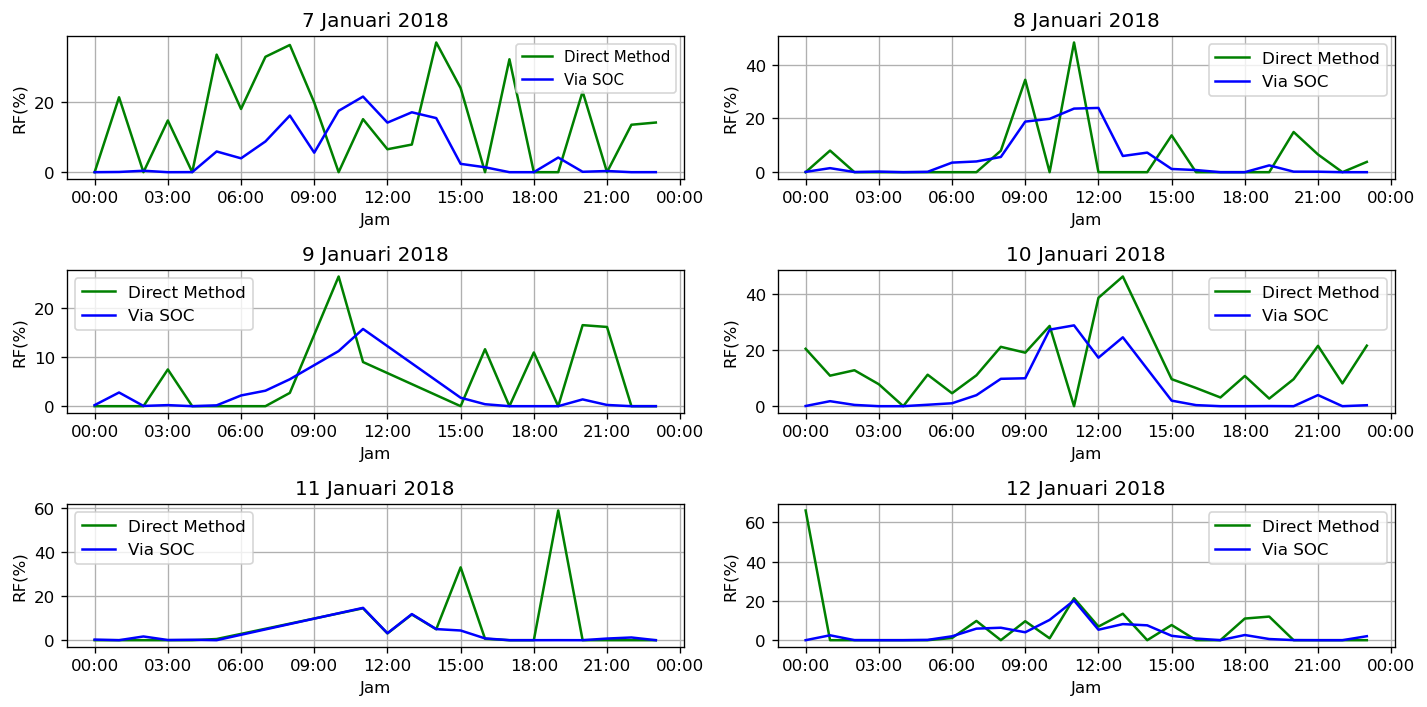

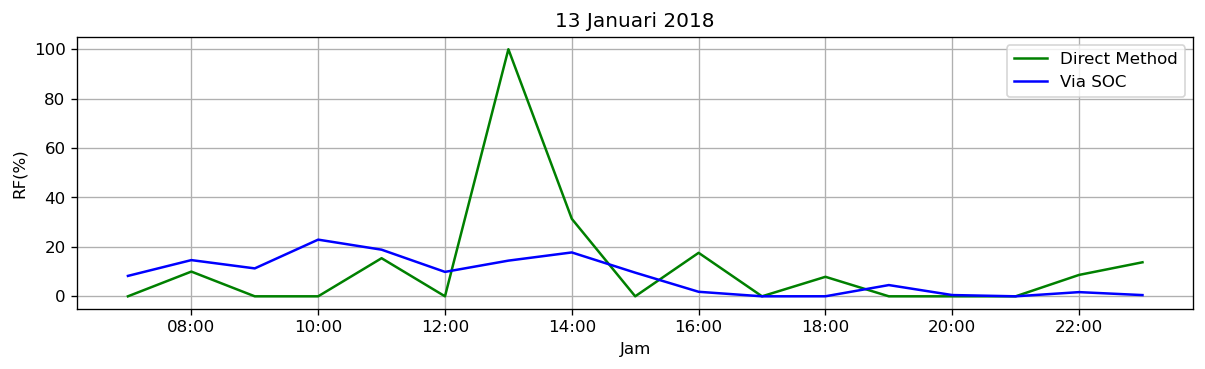

In [17]:
date_form = DateFormatter("%H:%M")
fig, axs = plt.subplots(3, 2, dpi=120, figsize=(12,6), squeeze=False)

axs[0,0].plot(RF_df['Direct Method']['2018-01-07'], color='g', label ='Direct Method')
axs[0,0].plot(RF_df['Via SOC']['2018-01-07'], color='b', label ='Via SOC')
axs[0,0].set_ylabel('RF(%)')
axs[0,0].set_xlabel('Jam')
axs[0,0].legend(loc=1, fontsize=9)
axs[0,0].set_title('7 Januari 2018')

axs[0,1].plot(RF_df['Direct Method']['2018-01-08'], color='g', label ='Direct Method')
axs[0,1].plot(RF_df['Via SOC']['2018-01-08'], color='b', label ='Via SOC')
axs[0,1].set_ylabel('RF(%)')
axs[0,1].set_xlabel('Jam')
axs[0,1].legend()
axs[0,1].set_title('8 Januari 2018')

axs[1,0].plot(RF_df['Direct Method']['2018-01-09'], color='g', label ='Direct Method')
axs[1,0].plot(RF_df['Via SOC']['2018-01-09'], color='b', label ='Via SOC')
axs[1,0].set_ylabel('RF(%)')
axs[1,0].set_xlabel('Jam')
axs[1,0].legend()
axs[1,0].set_title('9 Januari 2018')

axs[1,1].plot(RF_df['Direct Method']['2018-01-10'], color='g', label ='Direct Method')
axs[1,1].plot(RF_df['Via SOC']['2018-01-10'], color='b', label ='Via SOC')
axs[1,1].set_ylabel('RF(%)')
axs[1,1].set_xlabel('Jam')
axs[1,1].legend()
axs[1,1].set_title('10 Januari 2018')

axs[2,0].plot(RF_df['Direct Method']['2018-01-11'], color='g', label ='Direct Method')
axs[2,0].plot(RF_df['Via SOC']['2018-01-11'], color='b', label ='Via SOC')
axs[2,0].set_ylabel('RF(%)')
axs[2,0].set_xlabel('Jam')
axs[2,0].legend()
axs[2,0].set_title('11 Januari 2018')

axs[2,1].plot(RF_df['Direct Method']['2018-01-12'], color='g', label ='Direct Method')
axs[2,1].plot(RF_df['Via SOC']['2018-01-12'], color='b', label ='Via SOC')
axs[2,1].set_ylabel('RF(%)')
axs[2,1].set_xlabel('Jam')
axs[2,1].legend()
axs[2,1].set_title('12 Januari 2018')

axs[0,0].xaxis.set_major_formatter(date_form)
axs[0,1].xaxis.set_major_formatter(date_form)
axs[1,0].xaxis.set_major_formatter(date_form)
axs[1,1].xaxis.set_major_formatter(date_form)
axs[2,0].xaxis.set_major_formatter(date_form)
axs[2,1].xaxis.set_major_formatter(date_form)

axs[0,0].grid()
axs[0,1].grid()
axs[1,0].grid()
axs[1,1].grid()
axs[2,0].grid()
axs[2,1].grid()

plt.tight_layout();

fig.savefig('RF per hari (1).png')

fig, ax = plt.subplots(dpi=120, figsize=(12,3))

ax.plot(RF_df['Direct Method']['2018-01-13'], color='g', label ='Direct Method')
ax.plot(RF_df['Via SOC']['2018-01-13'], color='b', label ='Via SOC')
ax.set_ylabel('RF(%)')
ax.set_xlabel('Jam')
ax.legend()
ax.grid()
ax.set_title('13 Januari 2018')

ax.xaxis.set_major_formatter(date_form)

fig.savefig('RF per hari (2).png')

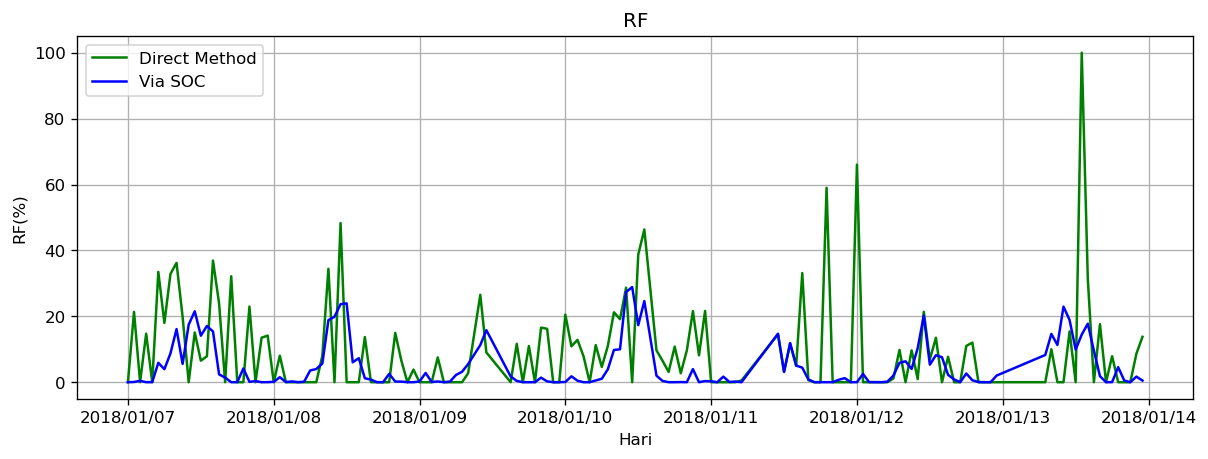

In [18]:
day_form = DateFormatter("%Y/%m/%d")
fig, ax = plt.subplots(dpi=120, figsize=(12,4))

ax.plot(RF_df['Direct Method'], color='g', label ='Direct Method')
ax.plot(RF_df['Via SOC'], color='b', label ='Via SOC')
ax.set_ylabel('RF(%)')
ax.set_xlabel('Hari')
ax.legend()
ax.grid()
ax.set_title('RF')

ax.xaxis.set_major_formatter(day_form)

fig.savefig('RF.png')

In [19]:
RF_day = pd.DataFrame({'Direct Method':fill_array(7, 0), 'Via SOC':fill_array(7, 0)})
RF_day[['Direct Method','Via SOC']] = RF_day[['Direct Method','Via SOC']].astype(float)

In [20]:
np.sum(RF_df['2018-01-9'])

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


Direct Method    101.183382
Via SOC           45.153345
dtype: object

In [21]:
for i in range(7):
    y = np.sum(RF_df['2018-01-'+str(i+7)])
    RF_day['Direct Method'][i] = y[0]
    RF_day['Via SOC'][i] = y[1]

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  


In [22]:
dti2 = pd.date_range("2018-01-07", periods=7, freq="D")
RF_day['Time'] = dti2
RF_day.set_index('Time', inplace=True)

In [23]:
RF_day

,Direct Method,Via SOC
Time,,
2018-01-07,349.569550,134.720373
2018-01-08,137.834824,119.752590
2018-01-09,101.183382,45.153345
2018-01-10,326.879598,132.439538
2018-01-11,127.538045,44.224403
2018-01-12,160.059822,80.889576
2018-01-13,204.721806,136.770287


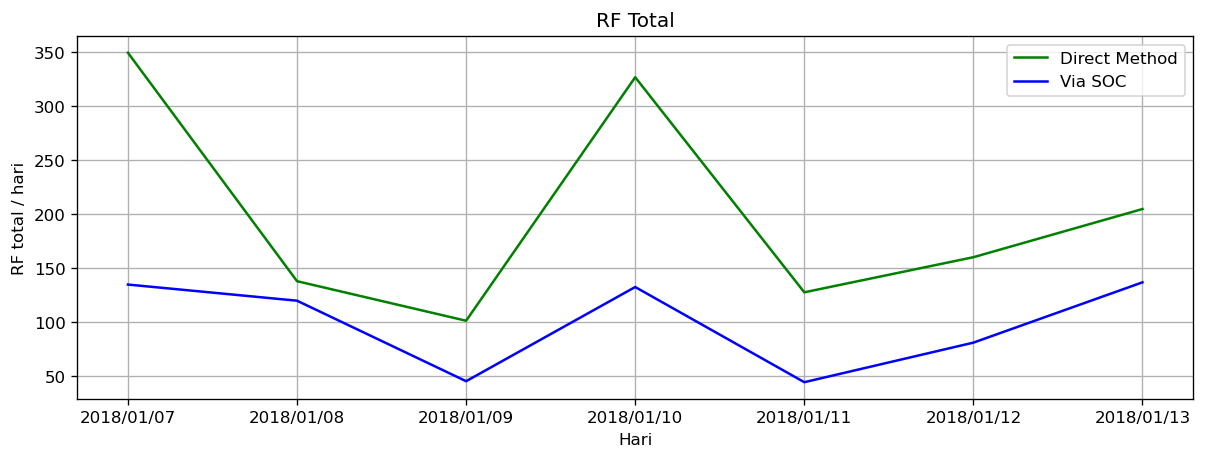

In [24]:
fig, ax = plt.subplots(dpi=120, figsize=(12,4))

ax.plot(RF_day['Direct Method'], color='g', label ='Direct Method')
ax.plot(RF_day['Via SOC'], color='b', label ='Via SOC')
ax.set_ylabel('RF total / hari')
ax.set_xlabel('Hari')
ax.legend()
ax.grid()
ax.set_title('RF Total')

ax.xaxis.set_major_formatter(day_form)

fig.savefig('RF total.png')

In [25]:
RF_mean = RF_day.copy()
for i in range(7):
    y = np.sum(RF_df['2018-01-'+str(i+7)])/len(RF_df['2018-01-'+str(i+7)])
    RF_mean['Direct Method'][i] = y[0]
    RF_mean['Via SOC'][i] = y[1]

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
RF_mean['Time'] = dti2
RF_mean.set_index('Time', inplace=True)

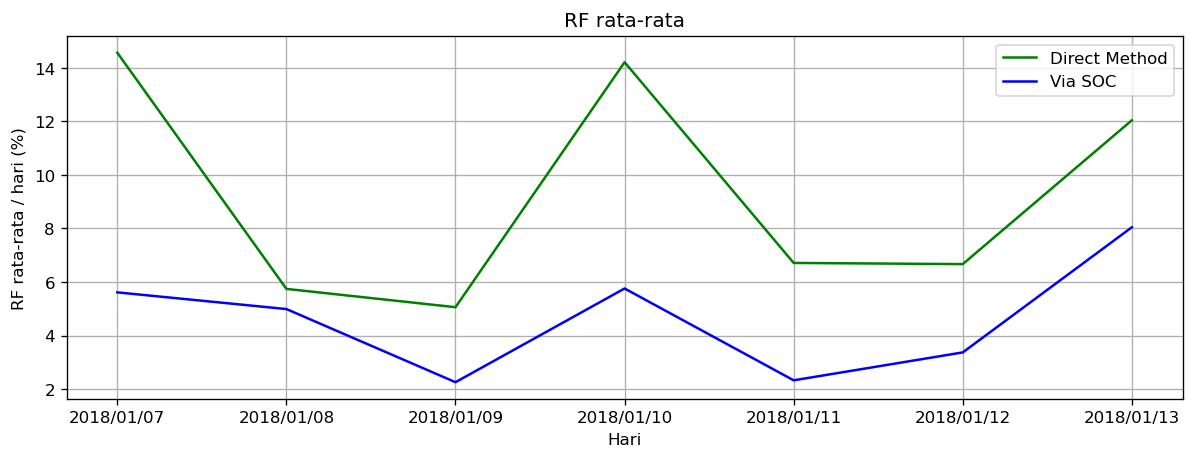

In [27]:
d_form = DateFormatter("2020/%m/%d")
fig, ax = plt.subplots(dpi=120, figsize=(12,4))

ax.plot(RF_mean['Direct Method'], color='g', label ='Direct Method')
ax.plot(RF_mean['Via SOC'], color='b', label ='Via SOC')
ax.set_ylabel('RF rata-rata / hari (%)')
ax.set_xlabel('Hari')
ax.legend()
ax.grid()
ax.set_title('RF rata-rata')

ax.xaxis.set_major_formatter(day_form)

fig.savefig('RF rata-rata.png')

## Rata-rata RF / Minggu

In [28]:
print('Rata-rata RF dengan Direct Method per minggunya adalah: ', round(np.mean(RF_mean['Direct Method']),2), '%')
print('Rata-rata RF dengan Via SOC per minggunya adalah:', round(np.mean(RF_mean['Via SOC']),2), '%')

Rata-rata RF dengan Direct Method per minggunya adalah:  9.29 %
Rata-rata RF dengan Via SOC per minggunya adalah: 4.62 %


# Plot RF + Degradasi PLTS

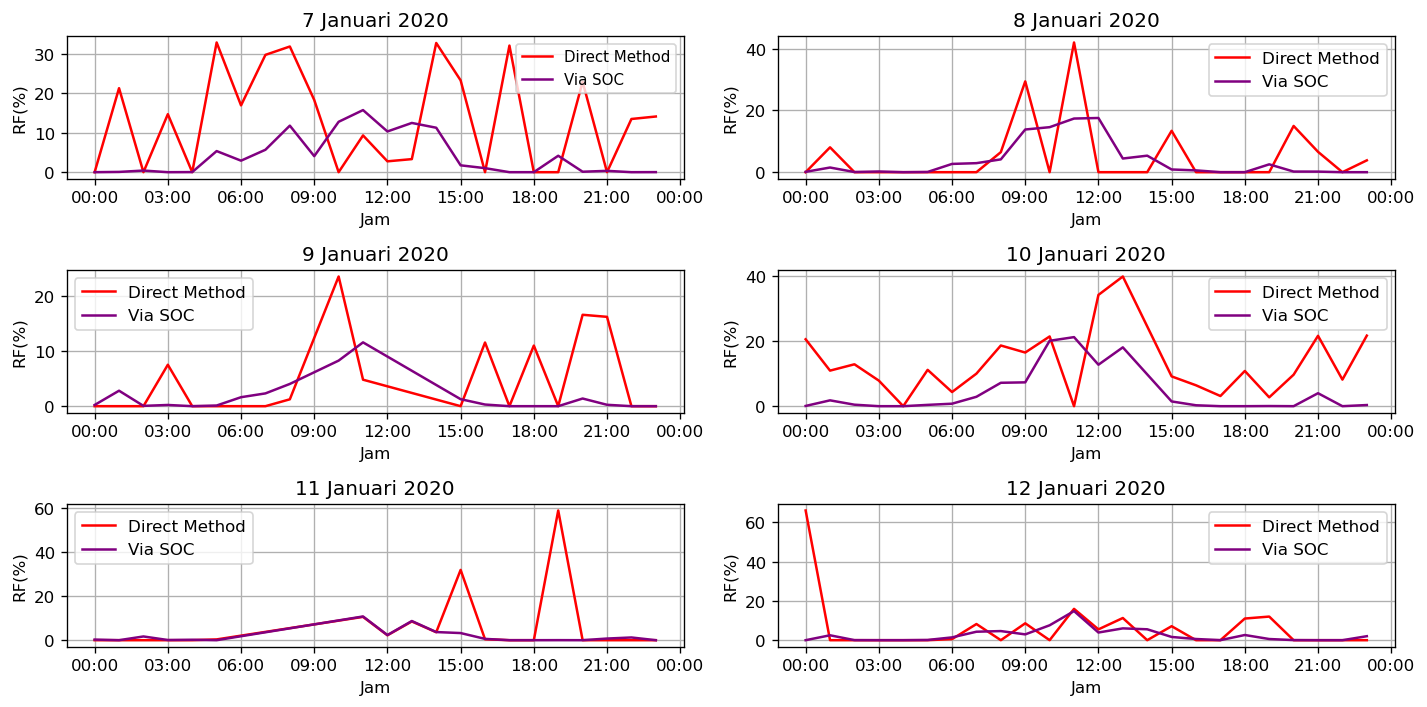

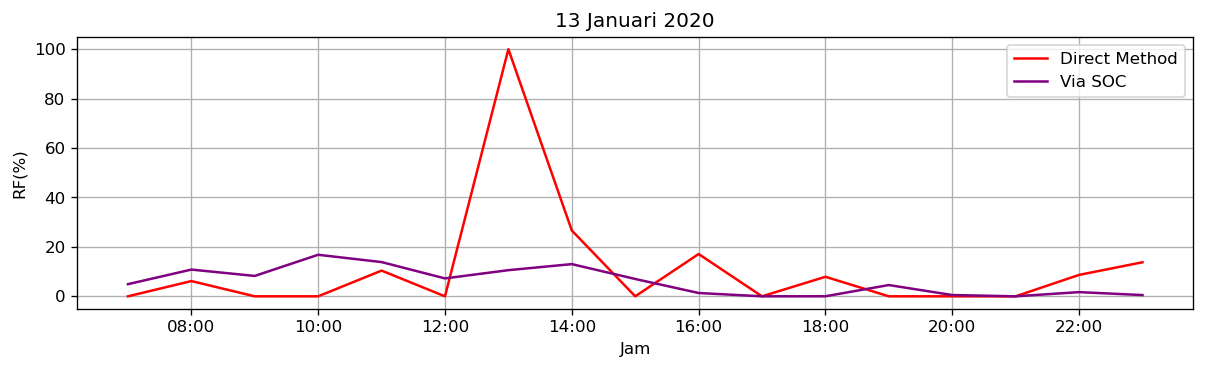

In [29]:
d_form = DateFormatter("2020/%m/%d")
fig, axs = plt.subplots(3, 2, dpi=120, figsize=(12,6), squeeze=False)

axs[0,0].plot(RF_plts_df['Direct Method']['2018-01-07'], color='red', label ='Direct Method')
axs[0,0].plot(RF_plts_df['Via SOC']['2018-01-07'], color='purple', label ='Via SOC')
axs[0,0].set_ylabel('RF(%)')
axs[0,0].set_xlabel('Jam')
axs[0,0].legend(loc=1, fontsize=9)
axs[0,0].set_title('7 Januari 2020')

axs[0,1].plot(RF_plts_df['Direct Method']['2018-01-08'], color='red', label ='Direct Method')
axs[0,1].plot(RF_plts_df['Via SOC']['2018-01-08'], color='purple', label ='Via SOC')
axs[0,1].set_ylabel('RF(%)')
axs[0,1].set_xlabel('Jam')
axs[0,1].legend()
axs[0,1].set_title('8 Januari 2020')

axs[1,0].plot(RF_plts_df['Direct Method']['2018-01-09'], color='red', label ='Direct Method')
axs[1,0].plot(RF_plts_df['Via SOC']['2018-01-09'], color='purple', label ='Via SOC')
axs[1,0].set_ylabel('RF(%)')
axs[1,0].set_xlabel('Jam')
axs[1,0].legend()
axs[1,0].set_title('9 Januari 2020')

axs[1,1].plot(RF_plts_df['Direct Method']['2018-01-10'], color='red', label ='Direct Method')
axs[1,1].plot(RF_plts_df['Via SOC']['2018-01-10'], color='purple', label ='Via SOC')
axs[1,1].set_ylabel('RF(%)')
axs[1,1].set_xlabel('Jam')
axs[1,1].legend()
axs[1,1].set_title('10 Januari 2020')

axs[2,0].plot(RF_plts_df['Direct Method']['2018-01-11'], color='red', label ='Direct Method')
axs[2,0].plot(RF_plts_df['Via SOC']['2018-01-11'], color='purple', label ='Via SOC')
axs[2,0].set_ylabel('RF(%)')
axs[2,0].set_xlabel('Jam')
axs[2,0].legend()
axs[2,0].set_title('11 Januari 2020')

axs[2,1].plot(RF_plts_df['Direct Method']['2018-01-12'], color='red', label ='Direct Method')
axs[2,1].plot(RF_plts_df['Via SOC']['2018-01-12'], color='purple', label ='Via SOC')
axs[2,1].set_ylabel('RF(%)')
axs[2,1].set_xlabel('Jam')
axs[2,1].legend()
axs[2,1].set_title('12 Januari 2020')

axs[0,0].xaxis.set_major_formatter(date_form)
axs[0,1].xaxis.set_major_formatter(date_form)
axs[1,0].xaxis.set_major_formatter(date_form)
axs[1,1].xaxis.set_major_formatter(date_form)
axs[2,0].xaxis.set_major_formatter(date_form)
axs[2,1].xaxis.set_major_formatter(date_form)

axs[0,0].grid()
axs[0,1].grid()
axs[1,0].grid()
axs[1,1].grid()
axs[2,0].grid()
axs[2,1].grid()

plt.tight_layout();

fig.savefig('RF per hari (PLTS) (1).png')

fig, ax = plt.subplots(dpi=120, figsize=(12,3))

ax.plot(RF_plts_df['Direct Method']['2018-01-13'], color='red', label ='Direct Method')
ax.plot(RF_plts_df['Via SOC']['2018-01-13'], color='purple', label ='Via SOC')
ax.set_ylabel('RF(%)')
ax.set_xlabel('Jam')
ax.legend()
ax.grid()
ax.set_title('13 Januari 2020')

ax.xaxis.set_major_formatter(date_form)

fig.savefig('RF per hari (PLTS) (2).png')

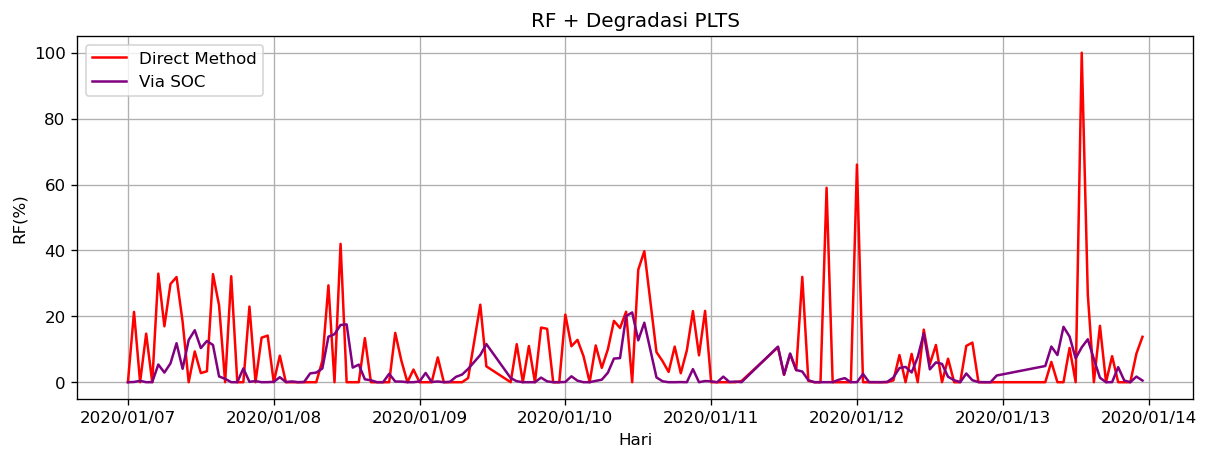

In [30]:
fig, ax = plt.subplots(dpi=120, figsize=(12,4))

ax.plot(RF_plts_df['Direct Method'], color='red', label ='Direct Method')
ax.plot(RF_plts_df['Via SOC'], color='purple', label ='Via SOC')
ax.set_ylabel('RF(%)')
ax.set_xlabel('Hari')
ax.legend()
ax.grid()
ax.set_title('RF + Degradasi PLTS')

ax.xaxis.set_major_formatter(d_form)

fig.savefig('RF (PLTS).png')

In [31]:
RF_plts_day = pd.DataFrame({'Direct Method':fill_array(7, 0), 'Via SOC':fill_array(7, 0)})
RF_plts_day[['Direct Method','Via SOC']] = RF_plts_day[['Direct Method','Via SOC']].astype(float)

In [32]:
for i in range(7):
    y = np.sum(RF_plts_df['2018-01-'+str(i+7)])
    RF_plts_day['Direct Method'][i] = y[0]
    RF_plts_day['Via SOC'][i] = y[1]

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  


In [33]:
RF_plts_day['Time'] = dti2
RF_plts_day.set_index('Time', inplace=True)

In [34]:
RF_plts_day

,Direct Method,Via SOC
Time,,
2018-01-07,320.396536,100.509432
2018-01-08,124.682306,89.143584
2018-01-09,92.397455,34.454641
2018-01-10,301.096823,98.933844
2018-01-11,116.703753,33.591829
2018-01-12,146.321234,61.377259
2018-01-13,190.660960,101.145995


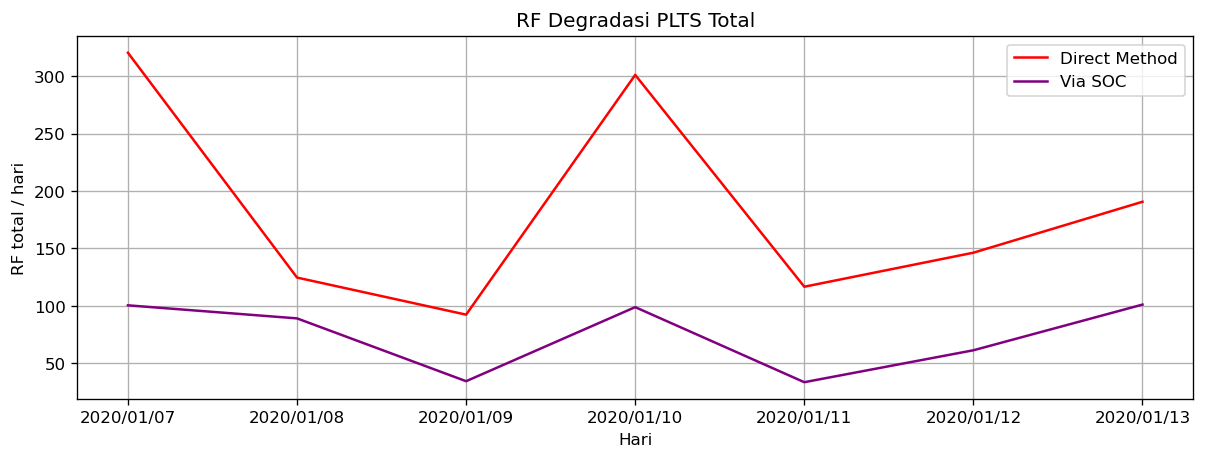

In [35]:
fig, ax = plt.subplots(dpi=120, figsize=(12,4))

ax.plot(RF_plts_day['Direct Method'], color='red', label ='Direct Method')
ax.plot(RF_plts_day['Via SOC'], color='purple', label ='Via SOC')
ax.set_ylabel('RF total / hari')
ax.set_xlabel('Hari')
ax.legend()
ax.grid()
ax.set_title('RF Degradasi PLTS Total')

ax.xaxis.set_major_formatter(d_form)

fig.savefig('RF total (PLTS).png')

In [36]:
RF_plts_mean = RF_plts_day.copy()
for i in range(7):
    y = np.sum(RF_plts_df['2018-01-'+str(i+7)])/len(RF_plts_df['2018-01-'+str(i+7)])
    RF_plts_mean['Direct Method'][i] = y[0]
    RF_plts_mean['Via SOC'][i] = y[1]

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [37]:
RF_plts_mean['Time'] = dti2
RF_plts_mean.set_index('Time', inplace=True)

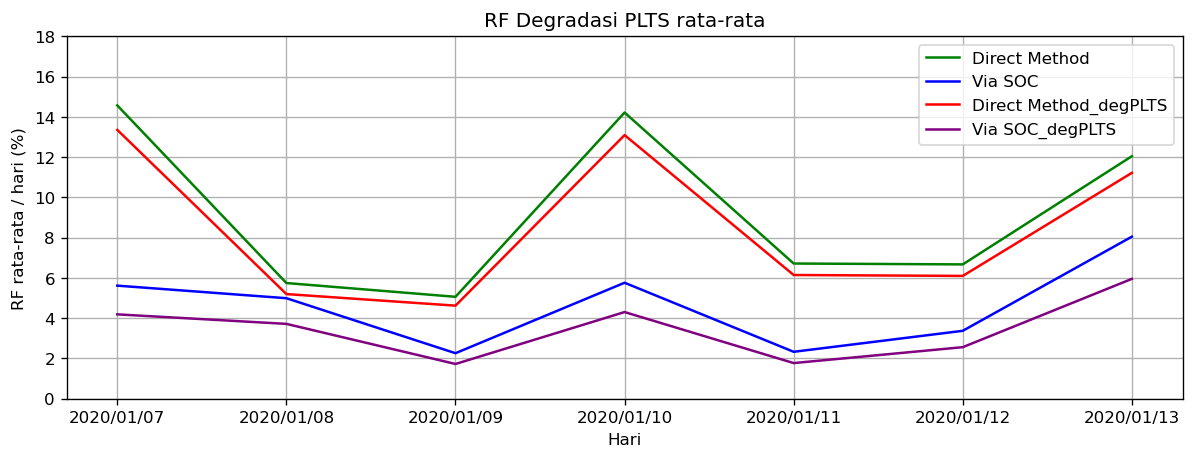

In [38]:
fig, ax = plt.subplots(dpi=120, figsize=(12,4))

ax.plot(RF_mean['Direct Method'], color='g', label ='Direct Method')
ax.plot(RF_mean['Via SOC'], color='b', label ='Via SOC')
ax.plot(RF_plts_mean['Direct Method'], color='red', label ='Direct Method_degPLTS')
ax.plot(RF_plts_mean['Via SOC'], color='purple', label ='Via SOC_degPLTS')
ax.set_ylabel('RF rata-rata / hari (%)')
ax.set_xlabel('Hari')
ax.set_ylim(0,18)
ax.legend()
ax.grid()
ax.set_title('RF Degradasi PLTS rata-rata')

ax.xaxis.set_major_formatter(d_form)

fig.savefig('RF rata-rata (PLTS).png')

## Rata-rata RF / Minggu Degradasi PLTS

In [39]:
print('Rata-rata RF dengan Direct Method per minggunya adalah: ', round(np.mean(RF_plts_mean['Direct Method']),2), '%')
print('Rata-rata RF dengan Via SOC per minggunya adalah:', round(np.mean(RF_plts_mean['Via SOC']),2), '%')

Rata-rata RF dengan Direct Method per minggunya adalah:  8.53 %
Rata-rata RF dengan Via SOC per minggunya adalah: 3.46 %


# RF + Degradasi Baterai

In [40]:
df_batt

,PrediksiBeban,PrediksiDayaBaterai,PrediksiSOC,PrediksiPLTS
Time,,,,
2018-01-07 00:00:00,320.11572,101.992300,0.375216,-0.1845
2018-01-07 01:00:00,255.07933,-54.481450,0.355183,-0.1845
2018-01-07 02:00:00,324.43027,99.480700,0.226248,-0.1845
2018-01-07 03:00:00,325.94418,-48.060207,1.082568,-0.1845
2018-01-07 04:00:00,288.28232,35.302810,1.072106,-0.1845
...,...,...,...,...
2018-01-13 19:00:00,171.82579,12.001025,0.321386,-0.1845
2018-01-13 20:00:00,284.51343,95.846850,0.181183,-0.1845
2018-01-13 21:00:00,309.98068,133.548870,1.085720,-0.1845


In [41]:
df_batt[['PrediksiDayaBaterai','PrediksiSOC']] = 0

In [42]:
df_batt

,PrediksiBeban,PrediksiDayaBaterai,PrediksiSOC,PrediksiPLTS
Time,,,,
2018-01-07 00:00:00,320.11572,0,0,-0.1845
2018-01-07 01:00:00,255.07933,0,0,-0.1845
2018-01-07 02:00:00,324.43027,0,0,-0.1845
2018-01-07 03:00:00,325.94418,0,0,-0.1845
2018-01-07 04:00:00,288.28232,0,0,-0.1845
...,...,...,...,...
2018-01-13 19:00:00,171.82579,0,0,-0.1845
2018-01-13 20:00:00,284.51343,0,0,-0.1845
2018-01-13 21:00:00,309.98068,0,0,-0.1845


In [43]:
df_batt['soe'] = (df_batt['PrediksiSOC'] + 0.01387)/1.01892

df_batt['Selisih SOE'] = '-'
for i in range (len(df_batt['soe'])-1):
    df_batt['Selisih SOE'][i+1] = df_batt['soe'][i+1]-df_batt['soe'][i]
    
df_batt['SOE'] = df_batt['Selisih SOE']
df_batt['SOE'][1:] = df_batt['Selisih SOE'][1:]/100

df_batt['Selisih Daya dari SOE'] = df_batt['SOE']
df_batt['Selisih Daya dari SOE'][1:] = df_batt['SOE'][1:]*1092

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [44]:
df_batt

,PrediksiBeban,PrediksiDayaBaterai,PrediksiSOC,PrediksiPLTS,soe,Selisih SOE,SOE,Selisih Daya dari SOE
Time,,,,,,,,
2018-01-07 00:00:00,320.11572,0,0,-0.1845,0.013612,-,-,-
2018-01-07 01:00:00,255.07933,0,0,-0.1845,0.013612,0.0,0.0,0.0
2018-01-07 02:00:00,324.43027,0,0,-0.1845,0.013612,0.0,0.0,0.0
2018-01-07 03:00:00,325.94418,0,0,-0.1845,0.013612,0.0,0.0,0.0
2018-01-07 04:00:00,288.28232,0,0,-0.1845,0.013612,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2018-01-13 19:00:00,171.82579,0,0,-0.1845,0.013612,0.0,0.0,0.0
2018-01-13 20:00:00,284.51343,0,0,-0.1845,0.013612,0.0,0.0,0.0
2018-01-13 21:00:00,309.98068,0,0,-0.1845,0.013612,0.0,0.0,0.0


In [45]:
SOE_df_batt = df_batt[['PrediksiSOC','PrediksiDayaBaterai','SOE','Selisih Daya dari SOE']]

In [46]:
df_batt['PLTSdegr'] = df_batt['PrediksiPLTS']*30/100
df_batt['Beban-PLTS'] = df_batt['PrediksiBeban'] - df_batt['PLTSdegr']

df_batt['PLNMethod1'] = df_batt['SOE']
df_batt['Direct Method'] = df_batt['SOE']
df_batt['PLNMethod2'] = df_batt['SOE']
df_batt['Via SOC'] = df_batt['SOE']

#Menghitung hasil Direct Method
df_batt['PLNMethod1'] = df_batt['Beban-PLTS'] + df_batt['PrediksiDayaBaterai']
df_batt['Direct Method'] = (1 -(df_batt['PLNMethod1']/df_batt['PrediksiBeban']))*100

#Menghitung hasil Via SOC
df_batt['PLNMethod2'][1:] = df_batt['Beban-PLTS'][1:] + df_batt['Selisih Daya dari SOE'][1:]
df_batt['Via SOC'][1:] = (1 -(df_batt['PLNMethod2'][1:]/df_batt['PrediksiBeban'][1:]))*100

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [47]:
df_batt

,PrediksiBeban,PrediksiDayaBaterai,PrediksiSOC,PrediksiPLTS,soe,Selisih SOE,SOE,Selisih Daya dari SOE,PLTSdegr,Beban-PLTS,PLNMethod1,Direct Method,PLNMethod2,Via SOC
Time,,,,,,,,,,,,,,
2018-01-07 00:00:00,320.11572,0,0,-0.1845,0.013612,-,-,-,-0.05535,320.17107,320.17107,-0.017291,-,-
2018-01-07 01:00:00,255.07933,0,0,-0.1845,0.013612,0.0,0.0,0.0,-0.05535,255.13468,255.13468,-0.021699,255.13468,-0.021699
2018-01-07 02:00:00,324.43027,0,0,-0.1845,0.013612,0.0,0.0,0.0,-0.05535,324.48562,324.48562,-0.017061,324.48562,-0.017061
2018-01-07 03:00:00,325.94418,0,0,-0.1845,0.013612,0.0,0.0,0.0,-0.05535,325.99953,325.99953,-0.016981,325.99953,-0.016981
2018-01-07 04:00:00,288.28232,0,0,-0.1845,0.013612,0.0,0.0,0.0,-0.05535,288.33767,288.33767,-0.019200,288.33767,-0.0192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-13 19:00:00,171.82579,0,0,-0.1845,0.013612,0.0,0.0,0.0,-0.05535,171.88114,171.88114,-0.032213,171.88114,-0.032213
2018-01-13 20:00:00,284.51343,0,0,-0.1845,0.013612,0.0,0.0,0.0,-0.05535,284.56878,284.56878,-0.019454,284.56878,-0.019454
2018-01-13 21:00:00,309.98068,0,0,-0.1845,0.013612,0.0,0.0,0.0,-0.05535,310.03603,310.03603,-0.017856,310.03603,-0.017856


In [48]:
RF_df_batt = df_batt[['Direct Method','Via SOC']]
RF_df_batt

,Direct Method,Via SOC
Time,,
2018-01-07 00:00:00,-0.017291,-
2018-01-07 01:00:00,-0.021699,-0.021699
2018-01-07 02:00:00,-0.017061,-0.017061
2018-01-07 03:00:00,-0.016981,-0.016981
2018-01-07 04:00:00,-0.019200,-0.0192
...,...,...
2018-01-13 19:00:00,-0.032213,-0.032213
2018-01-13 20:00:00,-0.019454,-0.019454
2018-01-13 21:00:00,-0.017856,-0.017856


In [49]:
for i in range (len(RF_df)):
    batt_x = RF_df_batt['Direct Method']
    batt_y = RF_df_batt['Via SOC']
    if batt_x[i] >= 100:
        batt_x[i] = 100
        
    elif batt_x[i] <= 0:
        batt_x[i] = 0
        
    if batt_y[i] == '-':
        batt_y[i] = 0
        
    if i >= 1:
        if batt_y[i] >= 100:
            batt_y[i] = 100
        elif batt_y[i] <= 0:
            batt_y[i] = 0

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [50]:
#Export RF_df to Excel (RF_batt.xlsx)
RF_batt = RF_df_batt.copy()
RF_batt.index = RF_batt.index.astype(str)
RF_batt.to_excel('RF_batt.xlsx')

## Plot RF + Degradasi Baterai

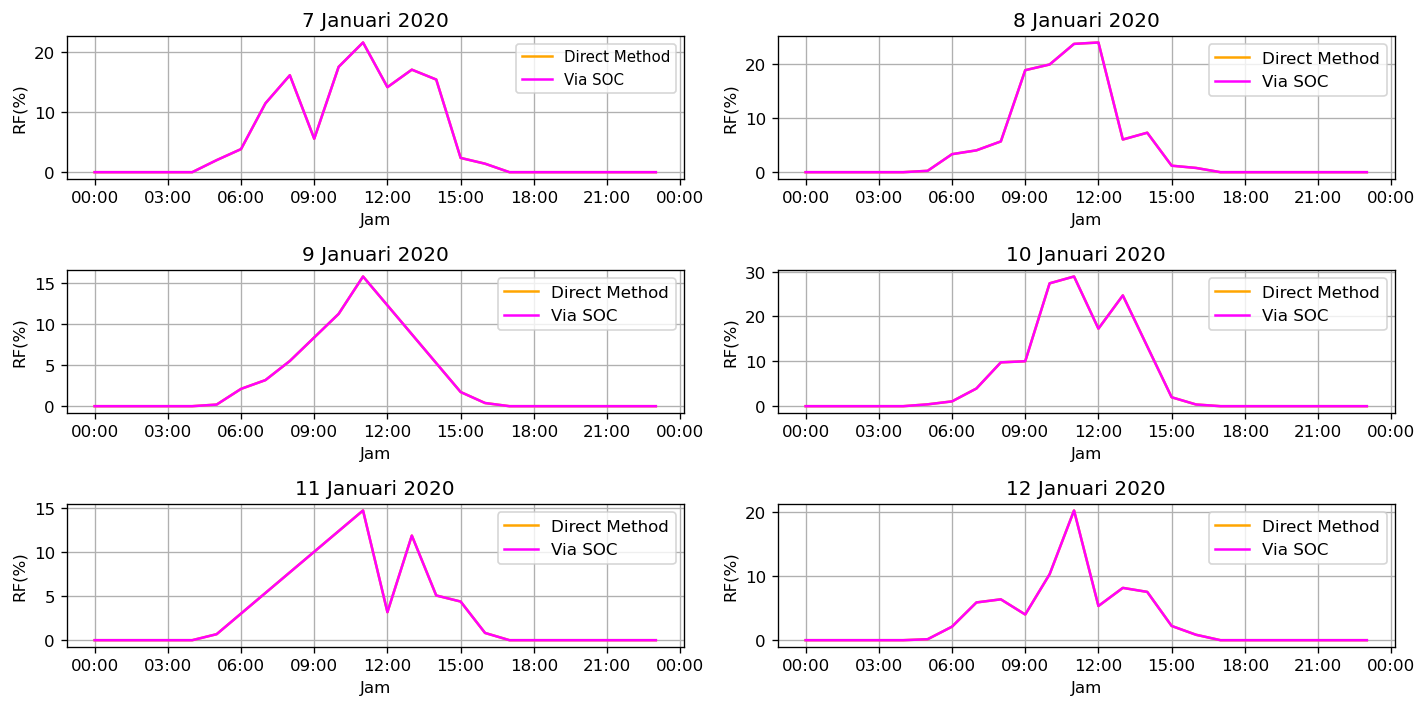

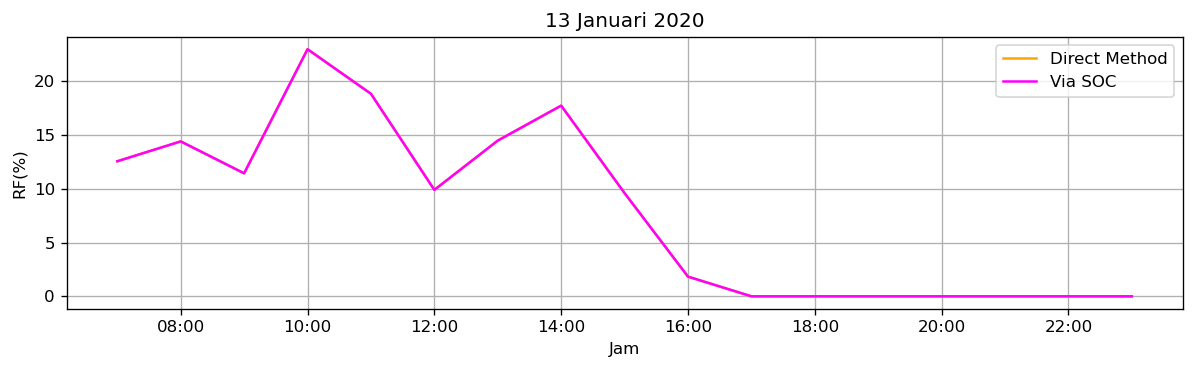

In [51]:
fig, axs = plt.subplots(3, 2, dpi=120, figsize=(12,6), squeeze=False)

axs[0,0].plot(RF_df_batt['Direct Method']['2018-01-07'], color='orange', label ='Direct Method')
axs[0,0].plot(RF_df_batt['Via SOC']['2018-01-07'], color='magenta', label ='Via SOC')
axs[0,0].set_ylabel('RF(%)')
axs[0,0].set_xlabel('Jam')
axs[0,0].legend(loc=1, fontsize=9)
axs[0,0].set_title('7 Januari 2020')

axs[0,1].plot(RF_df_batt['Direct Method']['2018-01-08'], color='orange', label ='Direct Method')
axs[0,1].plot(RF_df_batt['Via SOC']['2018-01-08'], color='magenta', label ='Via SOC')
axs[0,1].set_ylabel('RF(%)')
axs[0,1].set_xlabel('Jam')
axs[0,1].legend()
axs[0,1].set_title('8 Januari 2020')

axs[1,0].plot(RF_df_batt['Direct Method']['2018-01-09'], color='orange', label ='Direct Method')
axs[1,0].plot(RF_df_batt['Via SOC']['2018-01-09'], color='magenta', label ='Via SOC')
axs[1,0].set_ylabel('RF(%)')
axs[1,0].set_xlabel('Jam')
axs[1,0].legend()
axs[1,0].set_title('9 Januari 2020')

axs[1,1].plot(RF_df_batt['Direct Method']['2018-01-10'], color='orange', label ='Direct Method')
axs[1,1].plot(RF_df_batt['Via SOC']['2018-01-10'], color='magenta', label ='Via SOC')
axs[1,1].set_ylabel('RF(%)')
axs[1,1].set_xlabel('Jam')
axs[1,1].legend()
axs[1,1].set_title('10 Januari 2020')

axs[2,0].plot(RF_df_batt['Direct Method']['2018-01-11'], color='orange', label ='Direct Method')
axs[2,0].plot(RF_df_batt['Via SOC']['2018-01-11'], color='magenta', label ='Via SOC')
axs[2,0].set_ylabel('RF(%)')
axs[2,0].set_xlabel('Jam')
axs[2,0].legend()
axs[2,0].set_title('11 Januari 2020')

axs[2,1].plot(RF_df_batt['Direct Method']['2018-01-12'], color='orange', label ='Direct Method')
axs[2,1].plot(RF_df_batt['Via SOC']['2018-01-12'], color='magenta', label ='Via SOC')
axs[2,1].set_ylabel('RF(%)')
axs[2,1].set_xlabel('Jam')
axs[2,1].legend()
axs[2,1].set_title('12 Januari 2020')

axs[0,0].xaxis.set_major_formatter(date_form)
axs[0,1].xaxis.set_major_formatter(date_form)
axs[1,0].xaxis.set_major_formatter(date_form)
axs[1,1].xaxis.set_major_formatter(date_form)
axs[2,0].xaxis.set_major_formatter(date_form)
axs[2,1].xaxis.set_major_formatter(date_form)

axs[0,0].grid()
axs[0,1].grid()
axs[1,0].grid()
axs[1,1].grid()
axs[2,0].grid()
axs[2,1].grid()

plt.tight_layout();
fig.savefig('RF per hari (Baterai) (1).png')

fig, ax = plt.subplots(dpi=120, figsize=(12,3))

ax.plot(RF_df_batt['Direct Method']['2018-01-13'], color='orange', label ='Direct Method')
ax.plot(RF_df_batt['Via SOC']['2018-01-13'], color='magenta', label ='Via SOC')
ax.set_ylabel('RF(%)')
ax.set_xlabel('Jam')
ax.legend()
ax.grid()
ax.set_title('13 Januari 2020')

ax.xaxis.set_major_formatter(date_form)

fig.savefig('RF per hari (Baterai) (2).png')


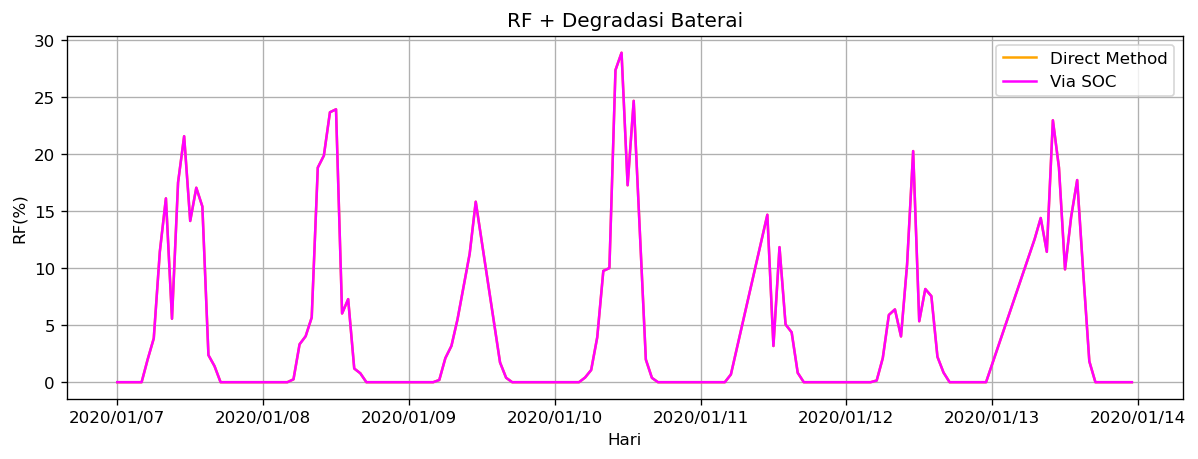

In [52]:
fig, ax = plt.subplots(dpi=120, figsize=(12,4))

ax.plot(RF_df_batt['Direct Method'], color='orange', label ='Direct Method')
ax.plot(RF_df_batt['Via SOC'], color='magenta', label ='Via SOC')
ax.set_ylabel('RF(%)')
ax.set_xlabel('Hari')
ax.legend()
ax.grid()
ax.set_title('RF + Degradasi Baterai')

ax.xaxis.set_major_formatter(d_form)

fig.savefig('RF (Baterai).png')

In [53]:
RF_batt_day = pd.DataFrame({'Direct Method':fill_array(7, 0), 'Via SOC':fill_array(7, 0)})
RF_batt_day[['Direct Method','Via SOC']] = RF_batt_day[['Direct Method','Via SOC']].astype(float)

In [54]:
for i in range(7):
    y = np.sum(RF_df_batt['2018-01-'+str(i+7)])
    RF_batt_day['Direct Method'][i] = y[0]
    RF_batt_day['Via SOC'][i] = y[1]

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  


In [55]:
RF_batt_day['Time'] = dti2
RF_batt_day.set_index('Time', inplace=True)

In [56]:
RF_batt_day

,Direct Method,Via SOC
Time,,
2018-01-07,128.446971,128.446971
2018-01-08,114.869328,114.869328
2018-01-09,40.207126,40.207126
2018-01-10,125.758240,125.758240
2018-01-11,40.636078,40.636078
2018-01-12,73.273096,73.273096
2018-01-13,133.693564,133.693564


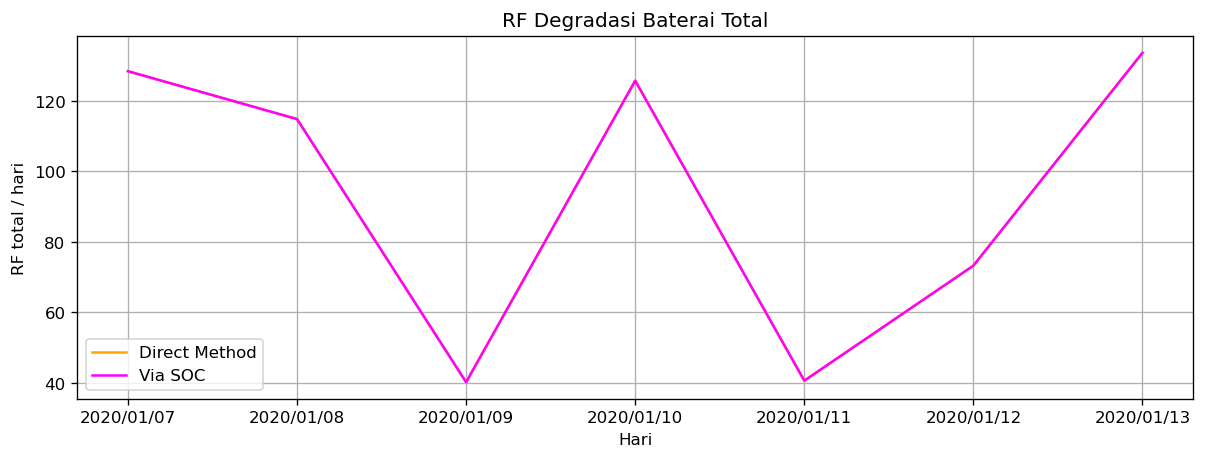

In [57]:
fig, ax = plt.subplots(dpi=120, figsize=(12,4))

ax.plot(RF_batt_day['Direct Method'], color='orange', label ='Direct Method')
ax.plot(RF_batt_day['Via SOC'], color='magenta', label ='Via SOC')
ax.set_ylabel('RF total / hari')
ax.set_xlabel('Hari')
ax.legend()
ax.grid()
ax.set_title('RF Degradasi Baterai Total')

ax.xaxis.set_major_formatter(d_form)

fig.savefig('RF total (Baterai).png')

In [58]:
RF_batt_mean = RF_batt_day.copy()
for i in range(7):
    y = np.sum(RF_df_batt['2018-01-'+str(i+7)])/len(RF_df_batt['2018-01-'+str(i+7)])
    RF_batt_mean['Direct Method'][i] = y[0]
    RF_batt_mean['Via SOC'][i] = y[1]

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [59]:
RF_batt_mean['Time'] = dti2
RF_batt_mean.set_index('Time', inplace=True)

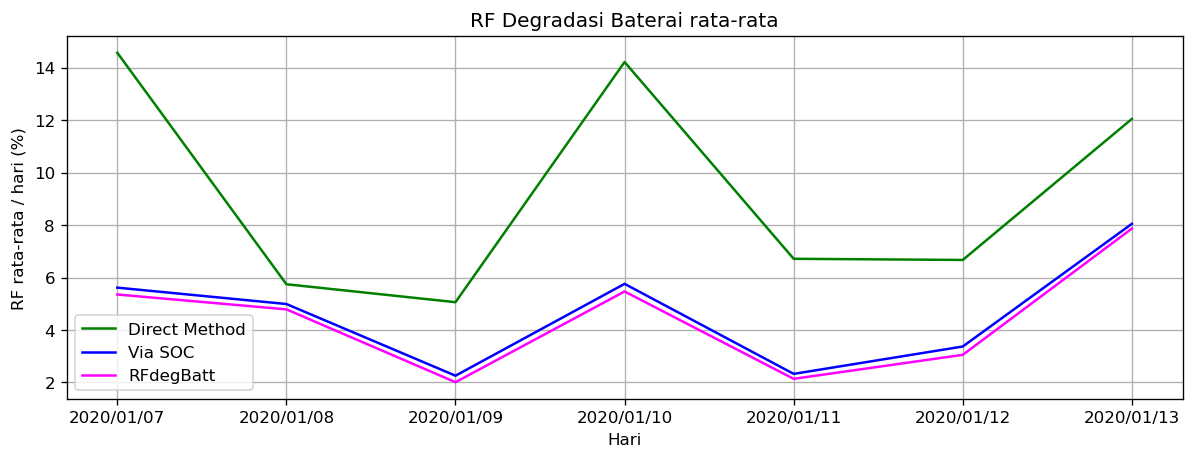

In [60]:
fig, ax = plt.subplots(dpi=120, figsize=(12,4))

ax.plot(RF_mean['Direct Method'], color='g', label ='Direct Method')
ax.plot(RF_mean['Via SOC'], color='b', label ='Via SOC')
ax.plot(RF_batt_mean['Direct Method'], color='magenta', label ='RFdegBatt')
ax.set_ylabel('RF rata-rata / hari (%)')
ax.set_xlabel('Hari')
ax.legend()
ax.grid()
ax.set_title('RF Degradasi Baterai rata-rata')

ax.xaxis.set_major_formatter(d_form)

fig.savefig('RF rata-rata (Baterai).png')

## Rata-rata RF / Minggu Degradasi  Baterai

In [61]:
print('Rata-rata RF degradasi baterai per minggunya adalah: ', round(np.mean(RF_batt_mean['Direct Method']),2), '%')

Rata-rata RF degradasi baterai per minggunya adalah:  4.38 %


# RF + Degradasi PLTS+Baterai

In [62]:
df_degbatt

,PrediksiBeban,PrediksiDayaBaterai,PrediksiSOC,PrediksiPLTS
Time,,,,
2018-01-07 00:00:00,320.11572,101.992300,0.375216,-0.1353
2018-01-07 01:00:00,255.07933,-54.481450,0.355183,-0.1353
2018-01-07 02:00:00,324.43027,99.480700,0.226248,-0.1353
2018-01-07 03:00:00,325.94418,-48.060207,1.082568,-0.1353
2018-01-07 04:00:00,288.28232,35.302810,1.072106,-0.1353
...,...,...,...,...
2018-01-13 19:00:00,171.82579,12.001025,0.321386,-0.1353
2018-01-13 20:00:00,284.51343,95.846850,0.181183,-0.1353
2018-01-13 21:00:00,309.98068,133.548870,1.085720,-0.1353


In [63]:
df_degbatt[['PrediksiDayaBaterai','PrediksiSOC']] = 0

In [64]:
df_degbatt

,PrediksiBeban,PrediksiDayaBaterai,PrediksiSOC,PrediksiPLTS
Time,,,,
2018-01-07 00:00:00,320.11572,0,0,-0.1353
2018-01-07 01:00:00,255.07933,0,0,-0.1353
2018-01-07 02:00:00,324.43027,0,0,-0.1353
2018-01-07 03:00:00,325.94418,0,0,-0.1353
2018-01-07 04:00:00,288.28232,0,0,-0.1353
...,...,...,...,...
2018-01-13 19:00:00,171.82579,0,0,-0.1353
2018-01-13 20:00:00,284.51343,0,0,-0.1353
2018-01-13 21:00:00,309.98068,0,0,-0.1353


In [65]:
df_degbatt['soe'] = (df_degbatt['PrediksiSOC'] + 0.01387)/1.01892

df_degbatt['Selisih SOE'] = '-'
for i in range (len(df_degbatt['soe'])-1):
    df_degbatt['Selisih SOE'][i+1] = df_degbatt['soe'][i+1]-df_degbatt['soe'][i]
    
df_degbatt['SOE'] = df_degbatt['Selisih SOE']
df_degbatt['SOE'][1:] = df_degbatt['Selisih SOE'][1:]/100

df_degbatt['Selisih Daya dari SOE'] = df_degbatt['SOE']
df_degbatt['Selisih Daya dari SOE'][1:] = df_degbatt['SOE'][1:]*1092

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [66]:
df_degbatt

,PrediksiBeban,PrediksiDayaBaterai,PrediksiSOC,PrediksiPLTS,soe,Selisih SOE,SOE,Selisih Daya dari SOE
Time,,,,,,,,
2018-01-07 00:00:00,320.11572,0,0,-0.1353,0.013612,-,-,-
2018-01-07 01:00:00,255.07933,0,0,-0.1353,0.013612,0.0,0.0,0.0
2018-01-07 02:00:00,324.43027,0,0,-0.1353,0.013612,0.0,0.0,0.0
2018-01-07 03:00:00,325.94418,0,0,-0.1353,0.013612,0.0,0.0,0.0
2018-01-07 04:00:00,288.28232,0,0,-0.1353,0.013612,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2018-01-13 19:00:00,171.82579,0,0,-0.1353,0.013612,0.0,0.0,0.0
2018-01-13 20:00:00,284.51343,0,0,-0.1353,0.013612,0.0,0.0,0.0
2018-01-13 21:00:00,309.98068,0,0,-0.1353,0.013612,0.0,0.0,0.0


In [67]:
SOE_df_degbatt = df_degbatt[['PrediksiSOC','PrediksiDayaBaterai','SOE','Selisih Daya dari SOE']]

In [68]:
df_degbatt['PLTSdegr'] = df_degbatt['PrediksiPLTS']*30/100
df_degbatt['Beban-PLTS'] = df_degbatt['PrediksiBeban'] - df_degbatt['PLTSdegr']

df_degbatt['PLNMethod1'] = df_degbatt['SOE']
df_degbatt['Direct Method'] = df_degbatt['SOE']
df_degbatt['PLNMethod2'] = df_degbatt['SOE']
df_degbatt['Via SOC'] = df_degbatt['SOE']

#Menghitung hasil Direct Method
df_degbatt['PLNMethod1'] = df_degbatt['Beban-PLTS'] + df_degbatt['PrediksiDayaBaterai']
df_degbatt['Direct Method'] = (1 -(df_degbatt['PLNMethod1']/df_degbatt['PrediksiBeban']))*100

#Menghitung hasil Via SOC
df_degbatt['PLNMethod2'][1:] = df_degbatt['Beban-PLTS'][1:] + df_degbatt['Selisih Daya dari SOE'][1:]
df_degbatt['Via SOC'][1:] = (1 -(df_degbatt['PLNMethod2'][1:]/df_degbatt['PrediksiBeban'][1:]))*100

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [69]:
df_degbatt

,PrediksiBeban,PrediksiDayaBaterai,PrediksiSOC,PrediksiPLTS,soe,Selisih SOE,SOE,Selisih Daya dari SOE,PLTSdegr,Beban-PLTS,PLNMethod1,Direct Method,PLNMethod2,Via SOC
Time,,,,,,,,,,,,,,
2018-01-07 00:00:00,320.11572,0,0,-0.1353,0.013612,-,-,-,-0.04059,320.15631,320.15631,-0.012680,-,-
2018-01-07 01:00:00,255.07933,0,0,-0.1353,0.013612,0.0,0.0,0.0,-0.04059,255.11992,255.11992,-0.015913,255.11992,-0.015913
2018-01-07 02:00:00,324.43027,0,0,-0.1353,0.013612,0.0,0.0,0.0,-0.04059,324.47086,324.47086,-0.012511,324.47086,-0.012511
2018-01-07 03:00:00,325.94418,0,0,-0.1353,0.013612,0.0,0.0,0.0,-0.04059,325.98477,325.98477,-0.012453,325.98477,-0.012453
2018-01-07 04:00:00,288.28232,0,0,-0.1353,0.013612,0.0,0.0,0.0,-0.04059,288.32291,288.32291,-0.014080,288.32291,-0.01408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-13 19:00:00,171.82579,0,0,-0.1353,0.013612,0.0,0.0,0.0,-0.04059,171.86638,171.86638,-0.023623,171.86638,-0.023623
2018-01-13 20:00:00,284.51343,0,0,-0.1353,0.013612,0.0,0.0,0.0,-0.04059,284.55402,284.55402,-0.014266,284.55402,-0.014266
2018-01-13 21:00:00,309.98068,0,0,-0.1353,0.013612,0.0,0.0,0.0,-0.04059,310.02127,310.02127,-0.013094,310.02127,-0.013094


In [70]:
RF_df_degbatt = df_degbatt[['Direct Method','Via SOC']]
RF_df_degbatt

,Direct Method,Via SOC
Time,,
2018-01-07 00:00:00,-0.012680,-
2018-01-07 01:00:00,-0.015913,-0.015913
2018-01-07 02:00:00,-0.012511,-0.012511
2018-01-07 03:00:00,-0.012453,-0.012453
2018-01-07 04:00:00,-0.014080,-0.01408
...,...,...
2018-01-13 19:00:00,-0.023623,-0.023623
2018-01-13 20:00:00,-0.014266,-0.014266
2018-01-13 21:00:00,-0.013094,-0.013094


In [71]:
for i in range (len(RF_df_degbatt)):
    degbatt_x = RF_df_degbatt['Direct Method']
    degbatt_y = RF_df_degbatt['Via SOC']
    if degbatt_x[i] >= 100:
        degbatt_x[i] = 100
        
    elif degbatt_x[i] <= 0:
        degbatt_x[i] = 0
        
    if degbatt_y[i] == '-':
        degbatt_y[i] = 0
        
    if i >= 1:
        if degbatt_y[i] >= 100:
            degbatt_y[i] = 100
        elif degbatt_y[i] <= 0:
            degbatt_y[i] = 0

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [72]:
#Export RF_df_degbatt to Excel (RF_degbatt.xlsx)
RF_degbatt = RF_df_degbatt.copy()
RF_degbatt.index = RF_degbatt.index.astype(str)
RF_degbatt.to_excel('RF_degbatt.xlsx')

# Plot RF + Degradasi Baterai+PLTS

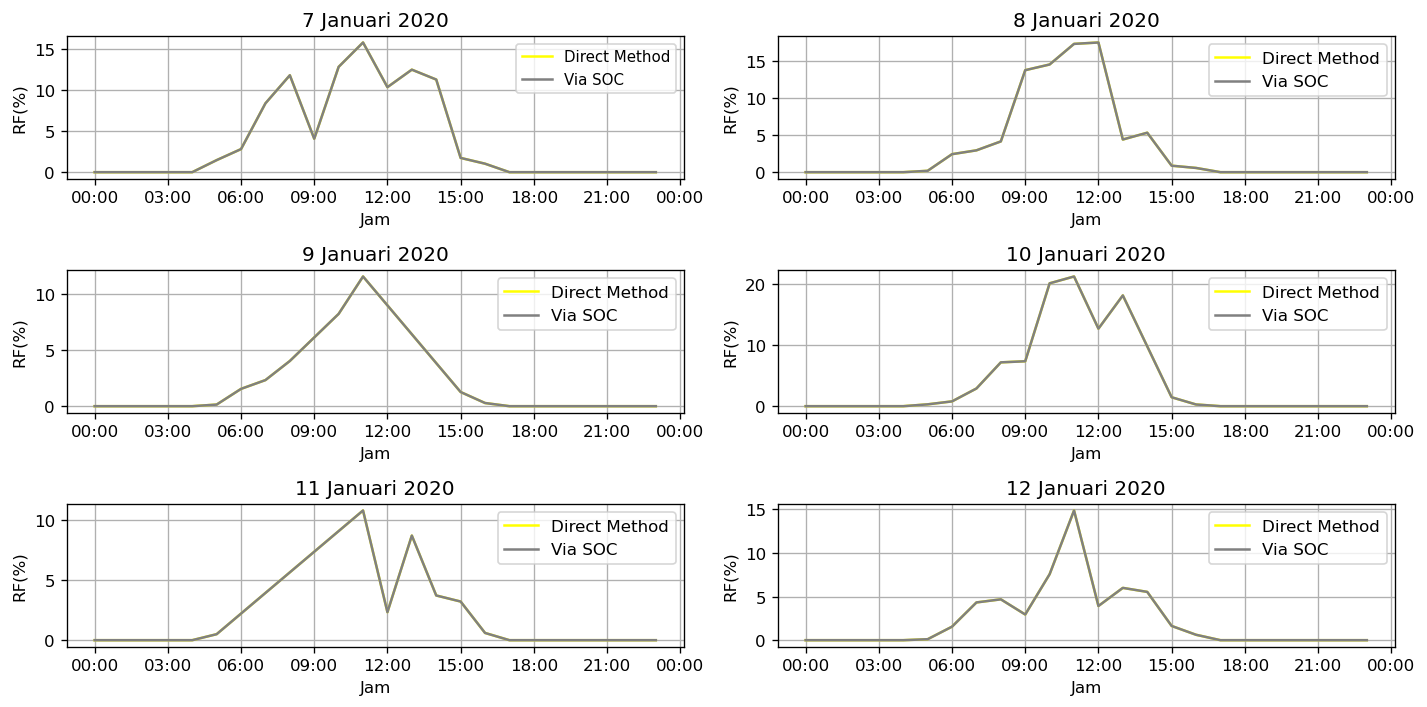

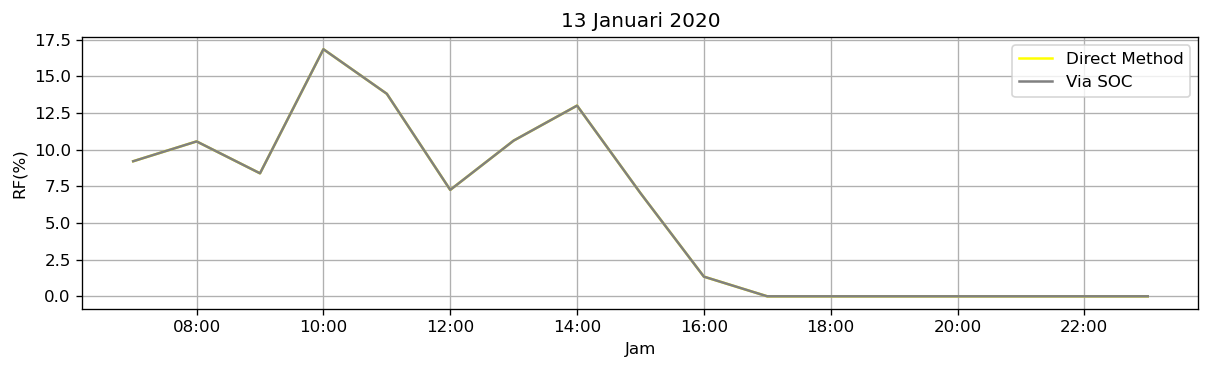

In [73]:
fig, axs = plt.subplots(3, 2, dpi=120, figsize=(12,6), squeeze=False)

axs[0,0].plot(RF_df_degbatt['Direct Method']['2018-01-07'], color='yellow', label ='Direct Method')
axs[0,0].plot(RF_df_degbatt['Via SOC']['2018-01-07'], color='grey', label ='Via SOC')
axs[0,0].set_ylabel('RF(%)')
axs[0,0].set_xlabel('Jam')
axs[0,0].legend(loc=1, fontsize=9)
axs[0,0].set_title('7 Januari 2020')

axs[0,1].plot(RF_df_degbatt['Direct Method']['2018-01-08'], color='yellow', label ='Direct Method')
axs[0,1].plot(RF_df_degbatt['Via SOC']['2018-01-08'], color='grey', label ='Via SOC')
axs[0,1].set_ylabel('RF(%)')
axs[0,1].set_xlabel('Jam')
axs[0,1].legend()
axs[0,1].set_title('8 Januari 2020')

axs[1,0].plot(RF_df_degbatt['Direct Method']['2018-01-09'], color='yellow', label ='Direct Method')
axs[1,0].plot(RF_df_degbatt['Via SOC']['2018-01-09'], color='grey', label ='Via SOC')
axs[1,0].set_ylabel('RF(%)')
axs[1,0].set_xlabel('Jam')
axs[1,0].legend()
axs[1,0].set_title('9 Januari 2020')

axs[1,1].plot(RF_df_degbatt['Direct Method']['2018-01-10'], color='yellow', label ='Direct Method')
axs[1,1].plot(RF_df_degbatt['Via SOC']['2018-01-10'], color='grey', label ='Via SOC')
axs[1,1].set_ylabel('RF(%)')
axs[1,1].set_xlabel('Jam')
axs[1,1].legend()
axs[1,1].set_title('10 Januari 2020')

axs[2,0].plot(RF_df_degbatt['Direct Method']['2018-01-11'], color='yellow', label ='Direct Method')
axs[2,0].plot(RF_df_degbatt['Via SOC']['2018-01-11'], color='grey', label ='Via SOC')
axs[2,0].set_ylabel('RF(%)')
axs[2,0].set_xlabel('Jam')
axs[2,0].legend()
axs[2,0].set_title('11 Januari 2020')

axs[2,1].plot(RF_df_degbatt['Direct Method']['2018-01-12'], color='yellow', label ='Direct Method')
axs[2,1].plot(RF_df_degbatt['Via SOC']['2018-01-12'], color='grey', label ='Via SOC')
axs[2,1].set_ylabel('RF(%)')
axs[2,1].set_xlabel('Jam')
axs[2,1].legend()
axs[2,1].set_title('12 Januari 2020')

axs[0,0].xaxis.set_major_formatter(date_form)
axs[0,1].xaxis.set_major_formatter(date_form)
axs[1,0].xaxis.set_major_formatter(date_form)
axs[1,1].xaxis.set_major_formatter(date_form)
axs[2,0].xaxis.set_major_formatter(date_form)
axs[2,1].xaxis.set_major_formatter(date_form)

axs[0,0].grid()
axs[0,1].grid()
axs[1,0].grid()
axs[1,1].grid()
axs[2,0].grid()
axs[2,1].grid()

plt.tight_layout();

fig.savefig('RF per hari (PLTS+Baterai) (1).png')

fig, ax = plt.subplots(dpi=120, figsize=(12,3))

ax.plot(RF_df_degbatt['Direct Method']['2018-01-13'], color='yellow', label ='Direct Method')
ax.plot(RF_df_degbatt['Via SOC']['2018-01-13'], color='grey', label ='Via SOC')
ax.set_ylabel('RF(%)')
ax.set_xlabel('Jam')
ax.legend()
ax.grid()
ax.set_title('13 Januari 2020')

ax.xaxis.set_major_formatter(date_form)

fig.savefig('RF per hari (PLTS+Baterai) (2).png')

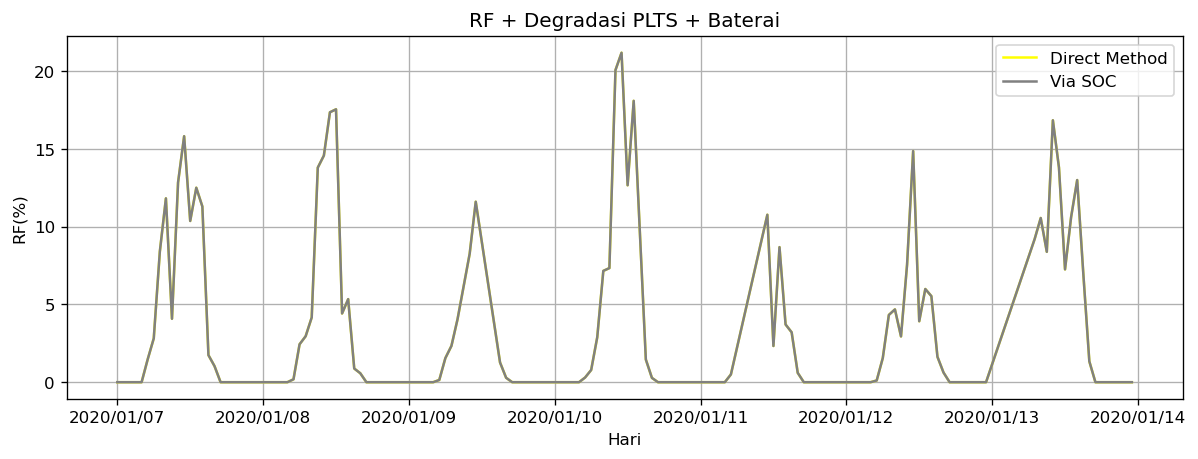

In [74]:
fig, ax = plt.subplots(dpi=120, figsize=(12,4))

ax.plot(RF_df_degbatt['Direct Method'], color='yellow', label ='Direct Method')
ax.plot(RF_df_degbatt['Via SOC'], color='grey', label ='Via SOC')
ax.set_ylabel('RF(%)')
ax.set_xlabel('Hari')
ax.legend()
ax.grid()
ax.set_title('RF + Degradasi PLTS + Baterai')

ax.xaxis.set_major_formatter(d_form)

fig.savefig('RF (PLTS+Baterai).png')

In [75]:
RF_degbatt_day = pd.DataFrame({'Direct Method':fill_array(7, 0), 'Via SOC':fill_array(7, 0)})
RF_degbatt_day[['Direct Method','Via SOC']] = RF_degbatt_day[['Direct Method','Via SOC']].astype(float)

In [76]:
for i in range(7):
    y = np.sum(RF_df_degbatt['2018-01-'+str(i+7)])
    RF_degbatt_day['Direct Method'][i] = y[0]
    RF_degbatt_day['Via SOC'][i] = y[1]

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  


In [77]:
RF_degbatt_day['Time'] = dti2
RF_degbatt_day.set_index('Time', inplace=True)

In [78]:
RF_degbatt_day

,Direct Method,Via SOC
Time,,
2018-01-07,94.194445,94.194445
2018-01-08,84.237507,84.237507
2018-01-09,29.485226,29.485226
2018-01-10,92.222709,92.222709
2018-01-11,29.799791,29.799791
2018-01-12,53.733604,53.733604
2018-01-13,98.041947,98.041947


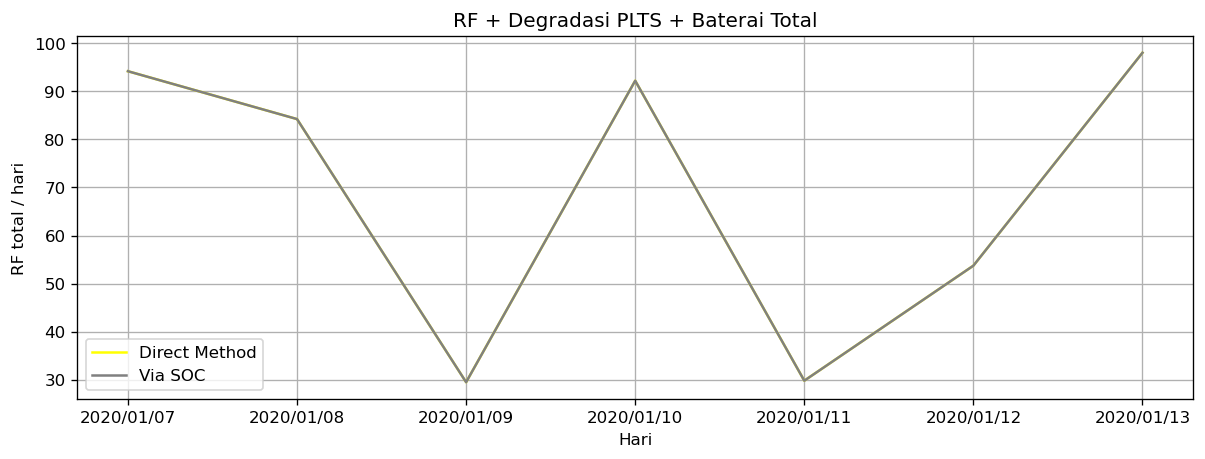

In [79]:
fig, ax = plt.subplots(dpi=120, figsize=(12,4))

ax.plot(RF_degbatt_day['Direct Method'], color='yellow', label ='Direct Method')
ax.plot(RF_degbatt_day['Via SOC'], color='grey', label ='Via SOC')
ax.set_ylabel('RF total / hari')
ax.set_xlabel('Hari')
ax.legend()
ax.grid()
ax.set_title('RF + Degradasi PLTS + Baterai Total')

ax.xaxis.set_major_formatter(d_form)

fig.savefig('RF total (PLTS+Baterai).png')

In [80]:
RF_degbatt_mean = RF_degbatt_day.copy()
for i in range(7):
    y = np.sum(RF_df_degbatt['2018-01-'+str(i+7)])/len(RF_df_degbatt['2018-01-'+str(i+7)])
    RF_degbatt_mean['Direct Method'][i] = y[0]
    RF_degbatt_mean['Via SOC'][i] = y[1]

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


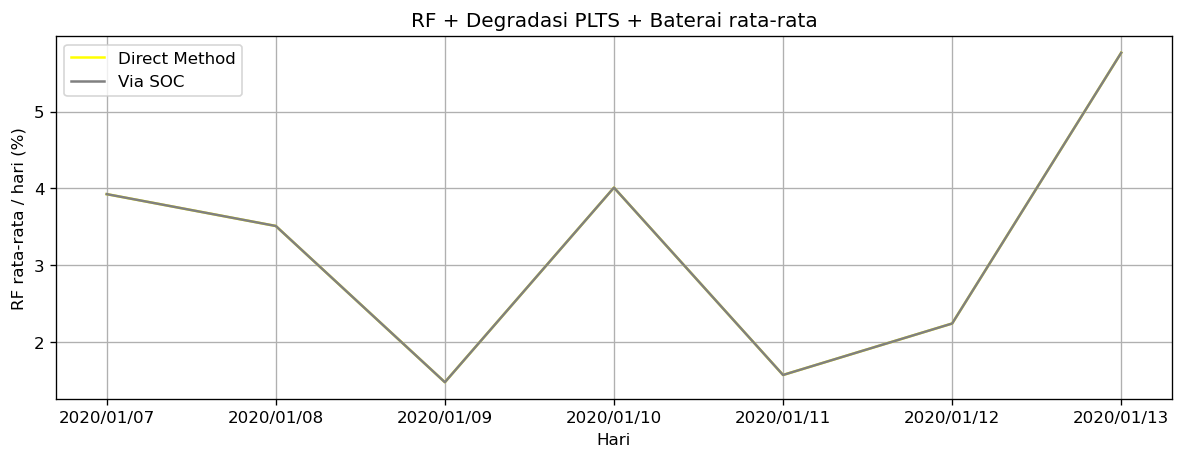

In [81]:
fig, ax = plt.subplots(dpi=120, figsize=(12,4))

ax.plot(RF_degbatt_mean['Direct Method'], color='yellow', label ='Direct Method')
ax.plot(RF_degbatt_mean['Via SOC'], color='grey', label ='Via SOC')
ax.set_ylabel('RF rata-rata / hari (%)')
ax.set_xlabel('Hari')
ax.legend()
ax.grid()
ax.set_title('RF + Degradasi PLTS + Baterai rata-rata')

ax.xaxis.set_major_formatter(d_form)

fig.savefig('RF rata-rata (PLTS+Baterai).png')

# Plot Gabungan

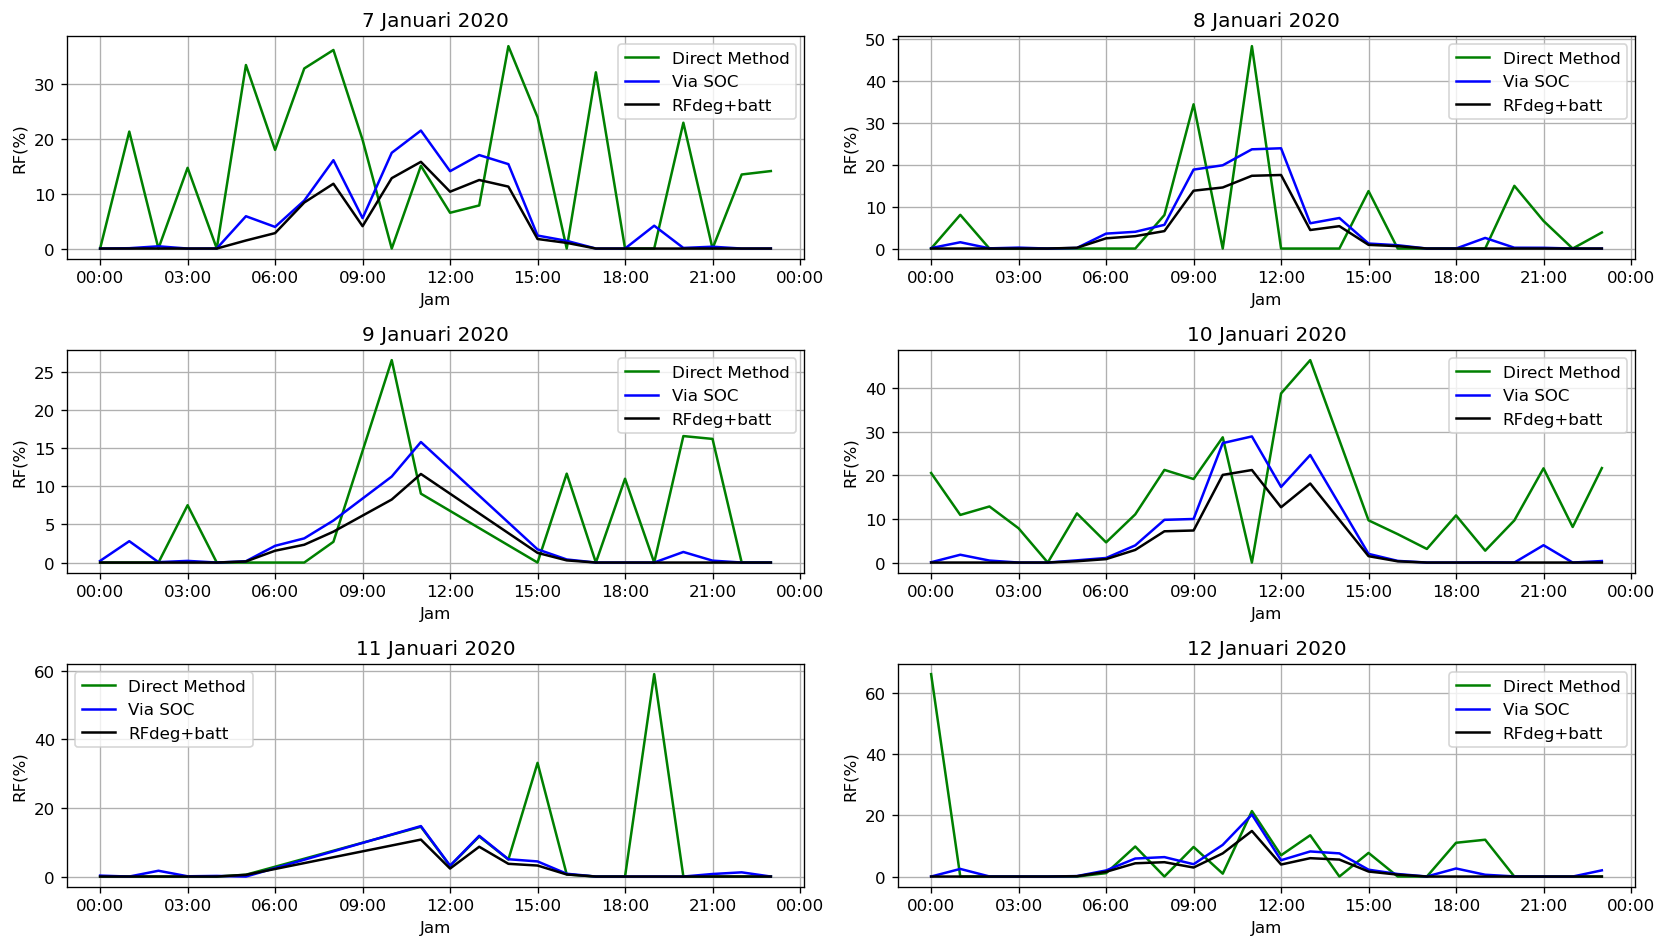

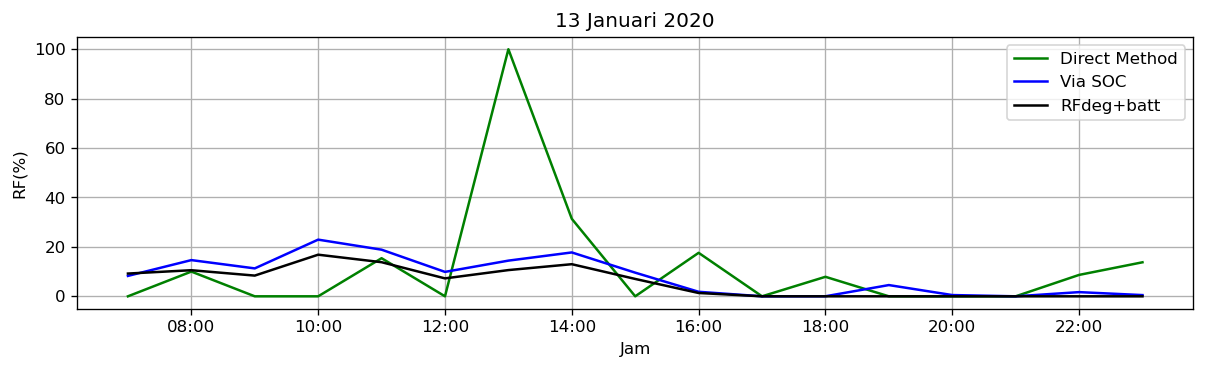

In [82]:
fig, axs = plt.subplots(3, 2, dpi=120, figsize=(14,8), squeeze=False)

axs[0,0].plot(RF_df['Direct Method']['2018-01-07'], color='g', label ='Direct Method')
axs[0,0].plot(RF_df['Via SOC']['2018-01-07'], color='b', label ='Via SOC')
axs[0,0].plot(RF_df_degbatt['Direct Method']['2018-01-07'], color='black', label ='RFdeg+batt')
axs[0,0].set_ylabel('RF(%)')
axs[0,0].set_xlabel('Jam')
axs[0,0].legend(loc=1)
axs[0,0].set_title('7 Januari 2020')

axs[0,1].plot(RF_df['Direct Method']['2018-01-08'], color='g', label ='Direct Method')
axs[0,1].plot(RF_df['Via SOC']['2018-01-08'], color='b', label ='Via SOC')
axs[0,1].plot(RF_df_degbatt['Direct Method']['2018-01-08'], color='black', label ='RFdeg+batt')
axs[0,1].set_ylabel('RF(%)')
axs[0,1].set_xlabel('Jam')
axs[0,1].legend()
axs[0,1].set_title('8 Januari 2020')

axs[1,0].plot(RF_df['Direct Method']['2018-01-09'], color='g', label ='Direct Method')
axs[1,0].plot(RF_df['Via SOC']['2018-01-09'], color='b', label ='Via SOC')
axs[1,0].plot(RF_df_degbatt['Direct Method']['2018-01-09'], color='black', label ='RFdeg+batt')
axs[1,0].set_ylabel('RF(%)')
axs[1,0].set_xlabel('Jam')
axs[1,0].legend()
axs[1,0].set_title('9 Januari 2020')

axs[1,1].plot(RF_df['Direct Method']['2018-01-10'], color='g', label ='Direct Method')
axs[1,1].plot(RF_df['Via SOC']['2018-01-10'], color='b', label ='Via SOC')
axs[1,1].plot(RF_df_degbatt['Direct Method']['2018-01-10'], color='black', label ='RFdeg+batt')
axs[1,1].set_ylabel('RF(%)')
axs[1,1].set_xlabel('Jam')
axs[1,1].legend()
axs[1,1].set_title('10 Januari 2020')

axs[2,0].plot(RF_df['Direct Method']['2018-01-11'], color='g', label ='Direct Method')
axs[2,0].plot(RF_df['Via SOC']['2018-01-11'], color='b', label ='Via SOC')
axs[2,0].plot(RF_df_degbatt['Direct Method']['2018-01-11'], color='black', label ='RFdeg+batt')
axs[2,0].set_ylabel('RF(%)')
axs[2,0].set_xlabel('Jam')
axs[2,0].legend()
axs[2,0].set_title('11 Januari 2020')

axs[2,1].plot(RF_df['Direct Method']['2018-01-12'], color='g', label ='Direct Method')
axs[2,1].plot(RF_df['Via SOC']['2018-01-12'], color='b', label ='Via SOC')
axs[2,1].plot(RF_df_degbatt['Direct Method']['2018-01-12'], color='black', label ='RFdeg+batt')
axs[2,1].set_ylabel('RF(%)')
axs[2,1].set_xlabel('Jam')
axs[2,1].legend()
axs[2,1].set_title('12 Januari 2020')

axs[0,0].xaxis.set_major_formatter(date_form)
axs[0,1].xaxis.set_major_formatter(date_form)
axs[1,0].xaxis.set_major_formatter(date_form)
axs[1,1].xaxis.set_major_formatter(date_form)
axs[2,0].xaxis.set_major_formatter(date_form)
axs[2,1].xaxis.set_major_formatter(date_form)

axs[0,0].grid()
axs[0,1].grid()
axs[1,0].grid()
axs[1,1].grid()
axs[2,0].grid()
axs[2,1].grid()

plt.tight_layout();

fig.savefig('RF per hari gabungan(PLTS+Baterai) (1).png')

fig, ax = plt.subplots(dpi=120, figsize=(12,3))

ax.plot(RF_df['Direct Method']['2018-01-13'], color='g', label ='Direct Method')
ax.plot(RF_df['Via SOC']['2018-01-13'], color='b', label ='Via SOC')
ax.plot(RF_df_degbatt['Direct Method']['2018-01-13'], color='black', label ='RFdeg+batt')
ax.set_ylabel('RF(%)')
ax.set_xlabel('Jam')
ax.legend()
ax.grid()
ax.set_title('13 Januari 2020')

ax.xaxis.set_major_formatter(date_form)

fig.savefig('RF per hari gabungan(PLTS+Baterai) (2).png')

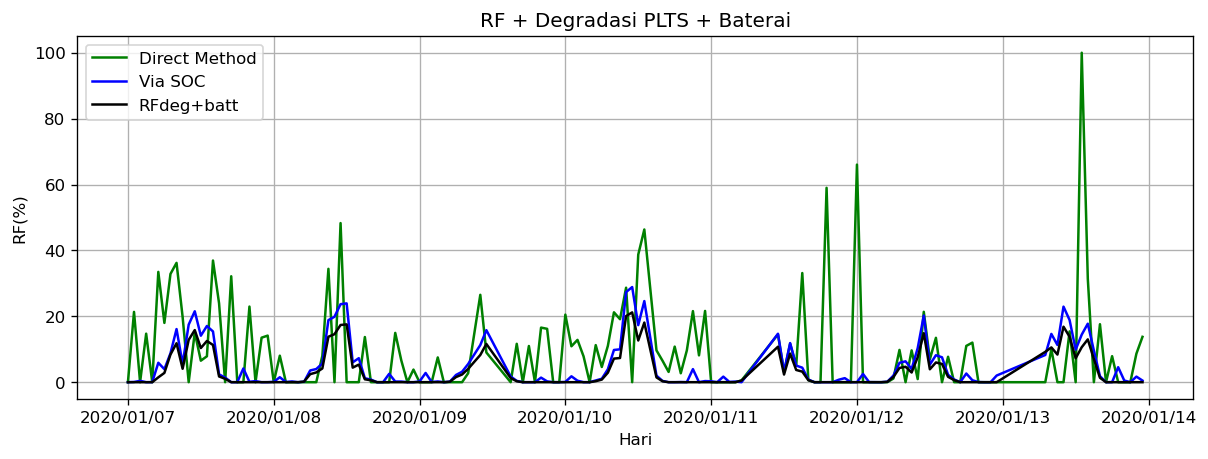

In [83]:
fig, ax = plt.subplots(dpi=120, figsize=(12,4))

ax.plot(RF_df['Direct Method'], color='g', label ='Direct Method')
ax.plot(RF_df['Via SOC'], color='b', label ='Via SOC')
ax.plot(RF_df_degbatt['Direct Method'], color='black', label ='RFdeg+batt')
ax.set_ylabel('RF(%)')
ax.set_xlabel('Hari')
ax.legend()
ax.grid()
ax.set_title('RF + Degradasi PLTS + Baterai')

ax.xaxis.set_major_formatter(d_form)

fig.savefig('RF gabungan(PLTS+Baterai).png')

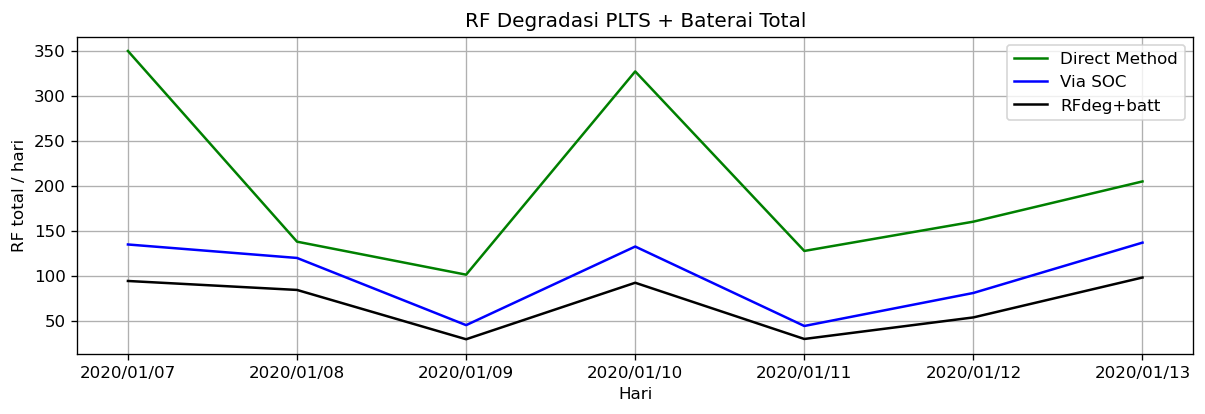

In [84]:
fig, ax = plt.subplots(dpi=120, figsize=(12,3.5))

ax.plot(RF_day['Direct Method'], color='g', label ='Direct Method')
ax.plot(RF_day['Via SOC'], color='b', label ='Via SOC')
ax.plot(RF_degbatt_day['Direct Method'], color='black', label ='RFdeg+batt')
ax.set_ylabel('RF total / hari')
ax.set_xlabel('Hari')
ax.legend()
ax.grid()
ax.set_title('RF Degradasi PLTS + Baterai Total')

ax.xaxis.set_major_formatter(d_form)

fig.savefig('RF Total gabungan(PLTS+Baterai).png')

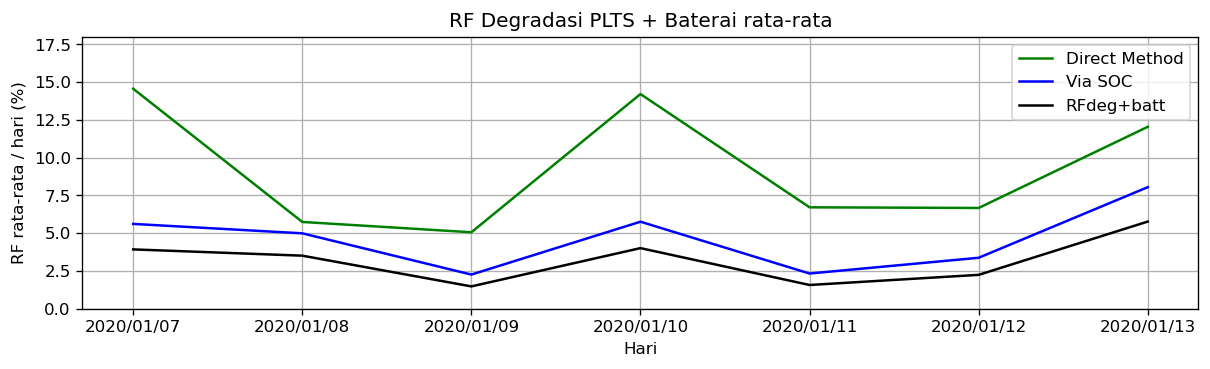

In [85]:
fig, ax = plt.subplots(dpi=120, figsize=(12,3))

ax.plot(RF_mean['Direct Method'], color='g', label ='Direct Method')
ax.plot(RF_mean['Via SOC'], color='b', label ='Via SOC')
ax.plot(RF_degbatt_mean['Direct Method'], color='black', label ='RFdeg+batt')
ax.set_ylabel('RF rata-rata / hari (%)')
ax.set_xlabel('Hari')
ax.legend()
ax.grid()
ax.set_title('RF Degradasi PLTS + Baterai rata-rata')

ax.set_ylim([0,18])

ax.xaxis.set_major_formatter(d_form)

fig.savefig('RF rata-rata gabungan (PLTS+Baterai).png')

## Rata-rata RF / Minggu Degradasi PLTS + Baterai

In [86]:
print('Rata-rata RF degradasi plts + baterai per minggunya adalah: ', round(np.mean(RF_degbatt_mean['Direct Method']),2), '%')

Rata-rata RF degradasi plts + baterai per minggunya adalah:  3.21 %


## Export to Excel

In [87]:
#Export RF_df to Excel (RF.xlsx)
RF = RF_df.copy()
RF.index = RF.index.astype(str)
RF.to_excel('RF.xlsx')

#Export RF_plts_df to Excel (RF Degradasi plts.xlsx)
RF_plts = RF_plts_df.copy()
RF_plts.index = RF_plts.index.astype(str)
RF_plts.to_excel('RF Degradasi PLTS.xlsx')

#Export RF_plts_df to Excel (RF Degradasi plts.xlsx)
RF_batt = RF_df_batt.copy()
RF_batt.index = RF_batt.index.astype(str)
RF_batt.to_excel('RF Degradasi Baterai.xlsx')

#Export RF_plts_df to Excel (RF Degradasi plts.xlsx)
RF_batt_PLTS = RF_df_degbatt.copy()
RF_batt_PLTS.index = RF_batt_PLTS.index.astype(str)
RF_batt_PLTS.to_excel('RF Degradasi Baterai + PLTS.xlsx')
